In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 120

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#FFA500'}, style='darkgrid')

In [3]:
# Read dataset
import pandas as pd

# Replace backslashes with double backslashes
df = pd.read_csv('C:\\Users\\itsme\\OneDrive\\Documents\\flights.csv\\flights1.csv')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [5]:
# Display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [6]:
# Convert 'id' and 'flight' to object data type
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

In [80]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,327346.0,6.564803,3.413444,1.0,4.0,7.0,10.0,12.0
day,327346.0,15.740825,8.777376,1.0,8.0,16.0,23.0,31.0
dep_time,327346.0,1348.789883,488.319979,1.0,907.0,1400.0,1744.0,2400.0
sched_dep_time,327346.0,1340.335098,467.413156,500.0,905.0,1355.0,1729.0,2359.0
dep_delay,327346.0,12.555156,40.065688,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,327346.0,1501.908238,532.888731,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,327346.0,1532.788426,497.979124,1.0,1122.0,1554.0,1944.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0
distance,327346.0,1048.371314,735.908523,80.0,509.0,888.0,1389.0,4983.0


In [8]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,id,carrier,flight,tailnum,origin,dest,time_hour,name
count,336776,336776,336776,334264,336776,336776,336776,336776
unique,336776,16,3844,4043,3,105,6936,16
top,0,UA,15,N725MQ,EWR,ORD,9/13/2013 8:00,United Air Lines Inc.
freq,1,58665,968,575,120835,17283,94,58665


In [27]:
import matplotlib.pyplot as plt

# Set color for the plots
color = '#8502d1'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    try:
        plt.figure(figsize=(15,5))
        counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
        plt.title(title, fontsize=15)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        # Add text annotation for frequencies
        for count, x in zip(counts, bins[:-1]):
            if count > 0:
                plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    try:
        plt.figure(figsize=(15,5))
        counts = column.value_counts()
        counts.plot(kind='bar', color=color, edgecolor='white')
        plt.title(title, fontsize=15)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        # Add text annotation for frequencies with rotation and larger font size
        for i, v in enumerate(counts):
            plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# plot_histogram(data['column_name'], bins=20, title='Histogram', xlabel='X Label')
# plot_bar(data['column_name'], title='Bar Plot', xlabel='X Label')


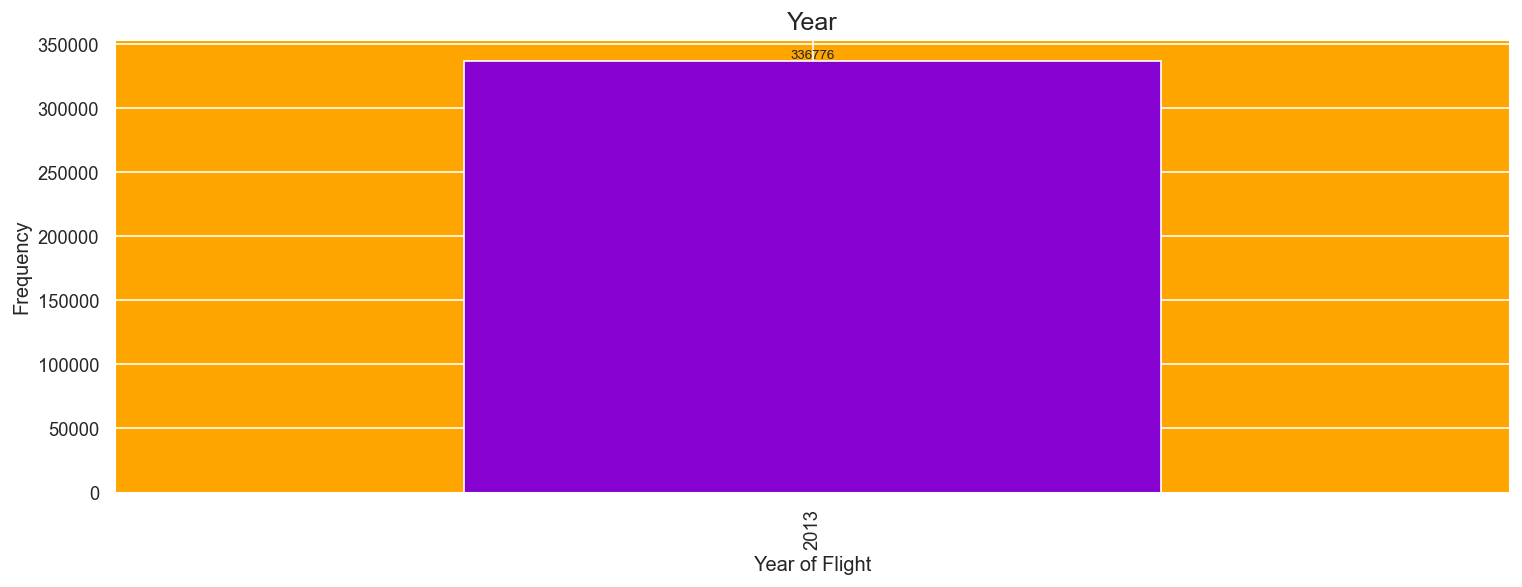

In [28]:
# The year in which the flight took place. The dataset includes flights from the year 2013.
plot_bar(df['year'], 'Year', 'Year of Flight')

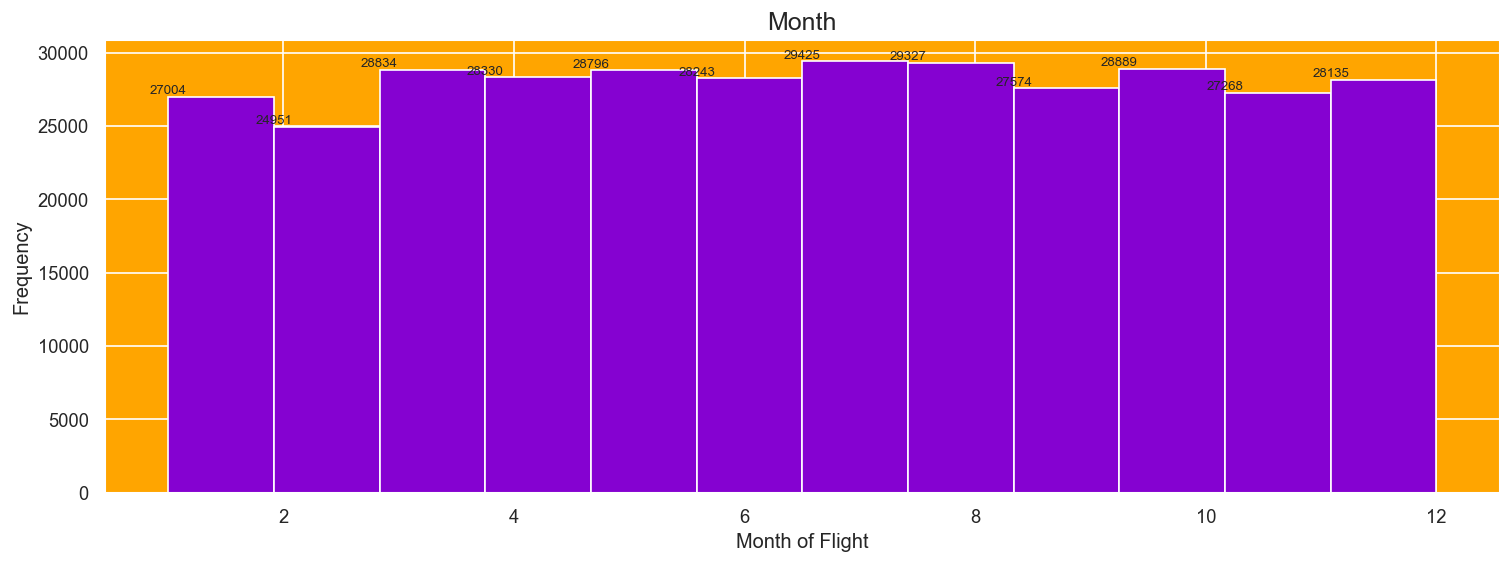

In [29]:
# The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December).
plot_hist(df['month'], bins=12, title='Month', xlabel='Month of Flight')

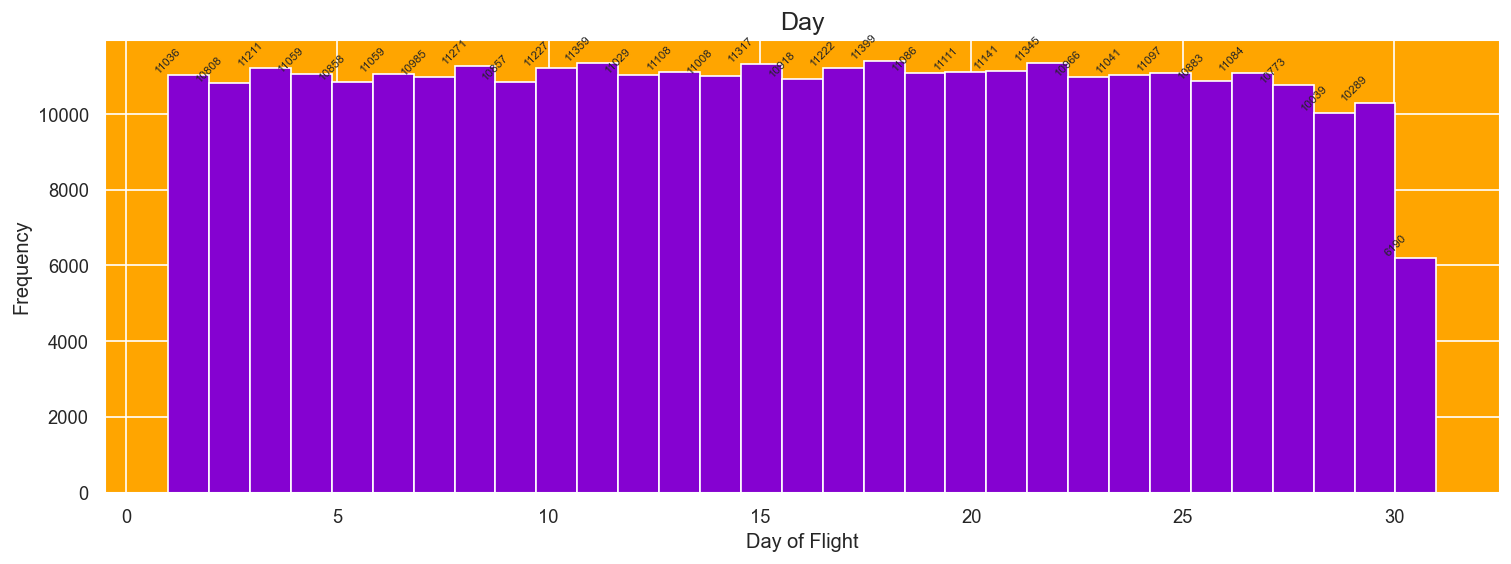

In [30]:
# The day of the month on which the flight took place, represented by an integer from 1 to 31.
plot_hist(df['day'], bins=31, title='Day', xlabel='Day of Flight', fontsize=7, rotation=45)

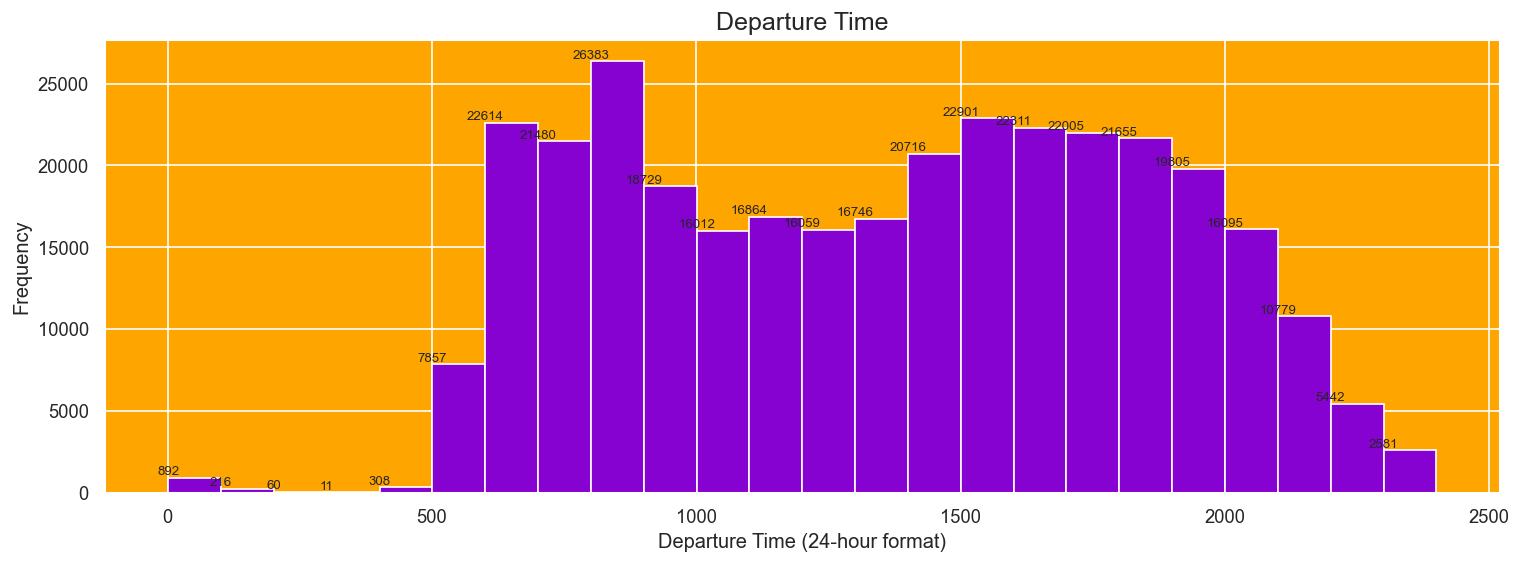

In [31]:
plot_hist(df['dep_time'].dropna(), bins=24, title='Departure Time', xlabel='Departure Time (24-hour format)')

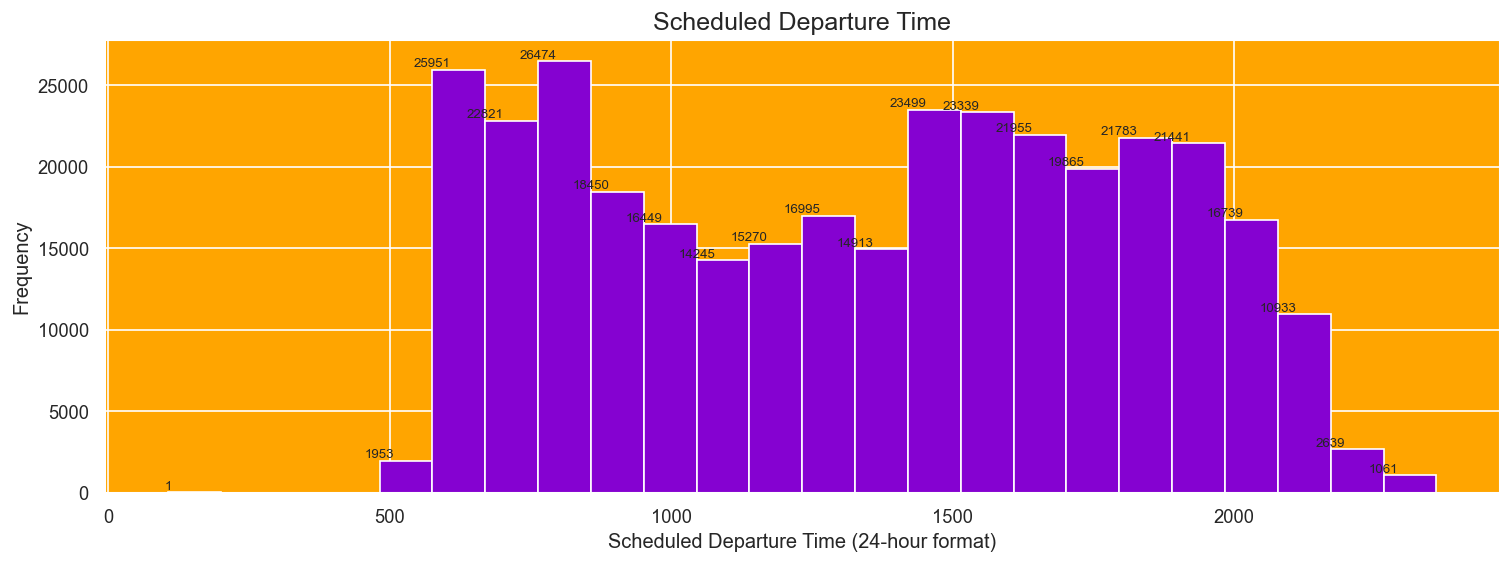

In [32]:
# The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm).
plot_hist(df['sched_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Scheduled Departure Time (24-hour format)')

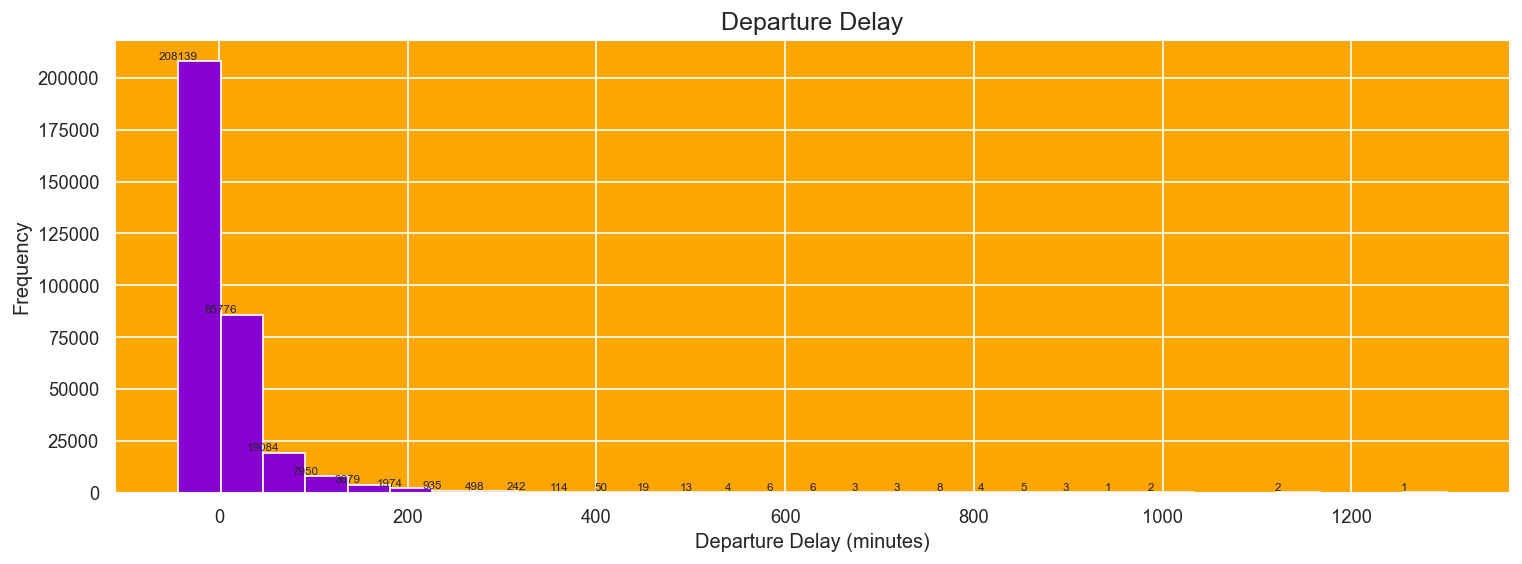

In [33]:
# The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. 
# Positive values indicate a delay, while negative values indicate an early departure.
plot_hist(df['dep_delay'].dropna(), bins=30, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

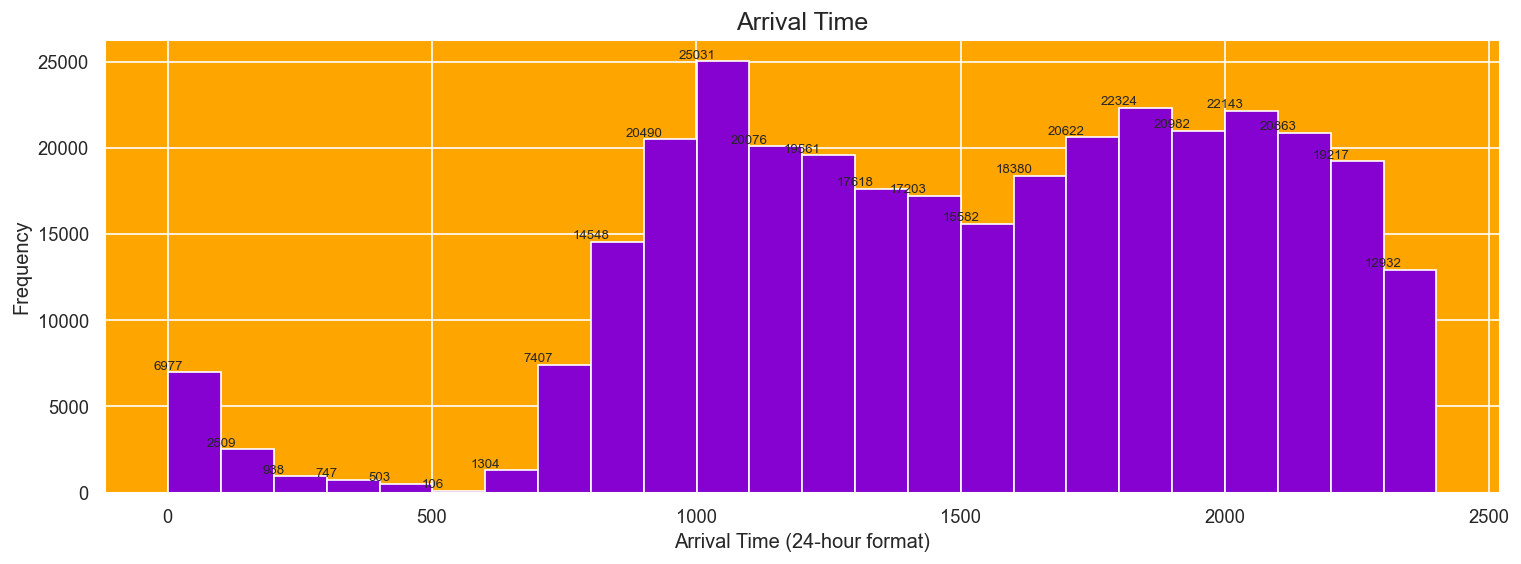

In [34]:
# The actual arrival time of the flight, represented in 24-hour format (hhmm).
plot_hist(df['arr_time'].dropna(), bins=24, title='Arrival Time', xlabel='Arrival Time (24-hour format)')

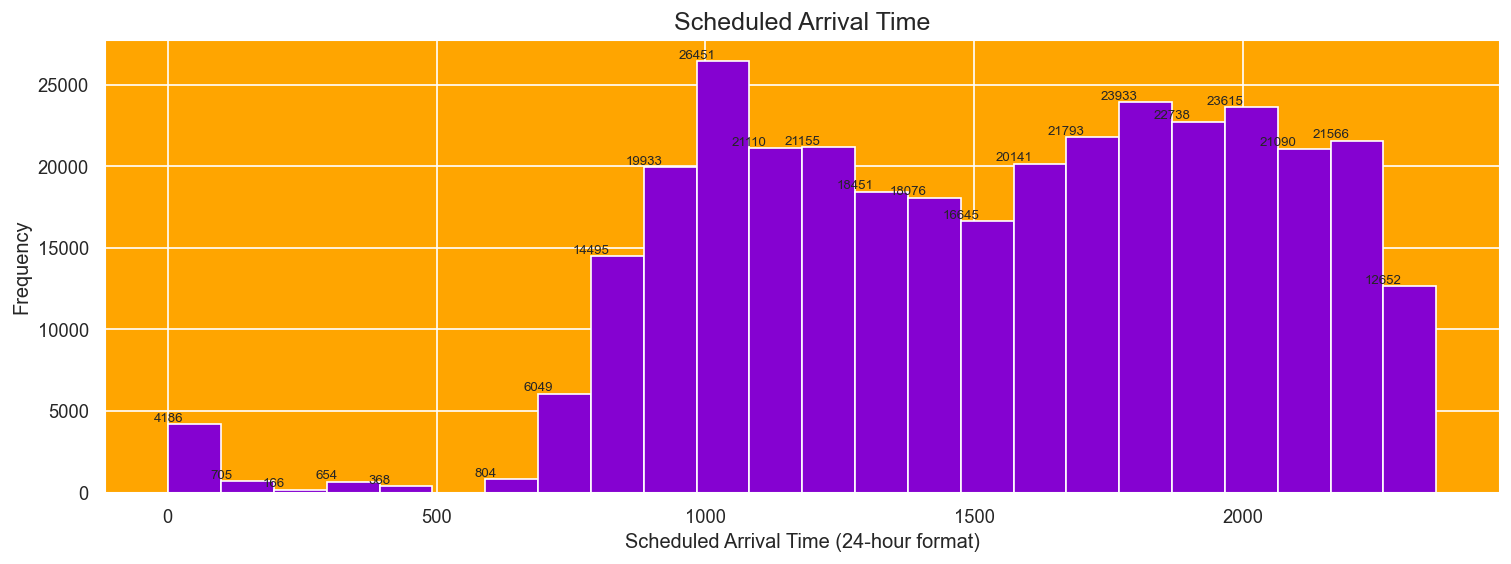

In [35]:
# The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm).
plot_hist(df['sched_arr_time'], bins=24, title='Scheduled Arrival Time', xlabel='Scheduled Arrival Time (24-hour format)')

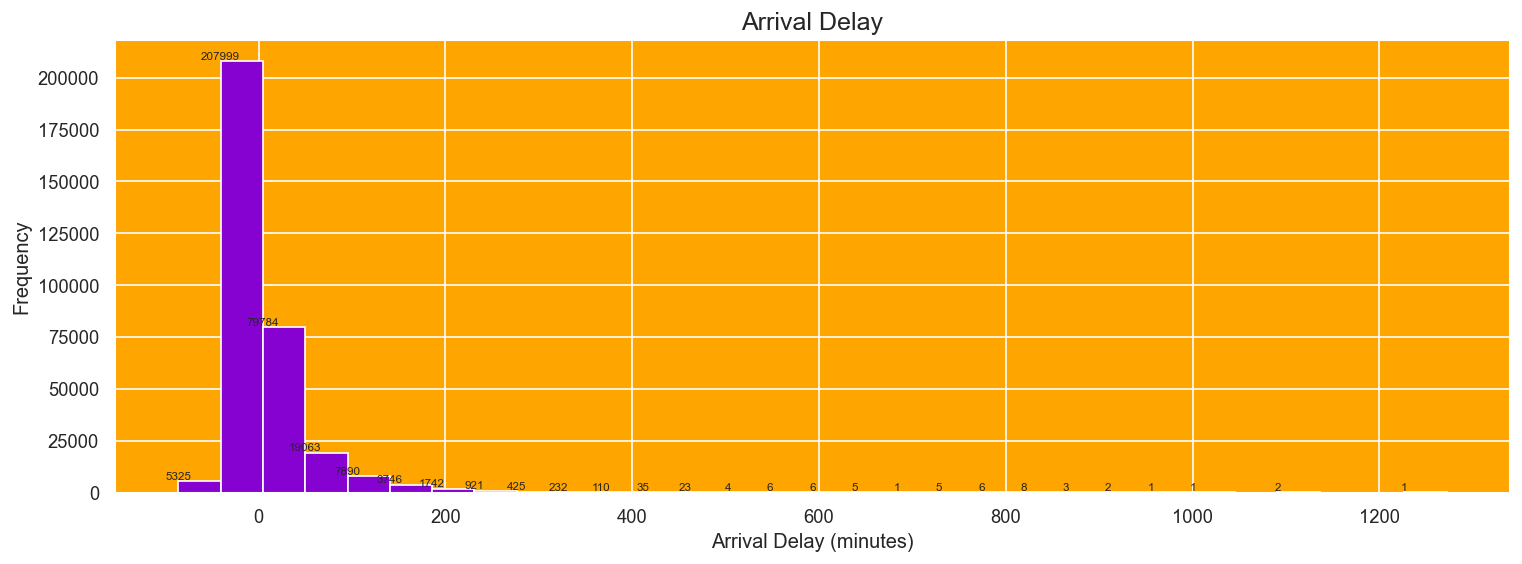

In [36]:
# The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. 
# Positive values indicate a delay, while negative values indicate an early arrival.
plot_hist(df['arr_delay'].dropna(), bins=30, title='Arrival Delay', xlabel='Arrival Delay (minutes)', fontsize=7)

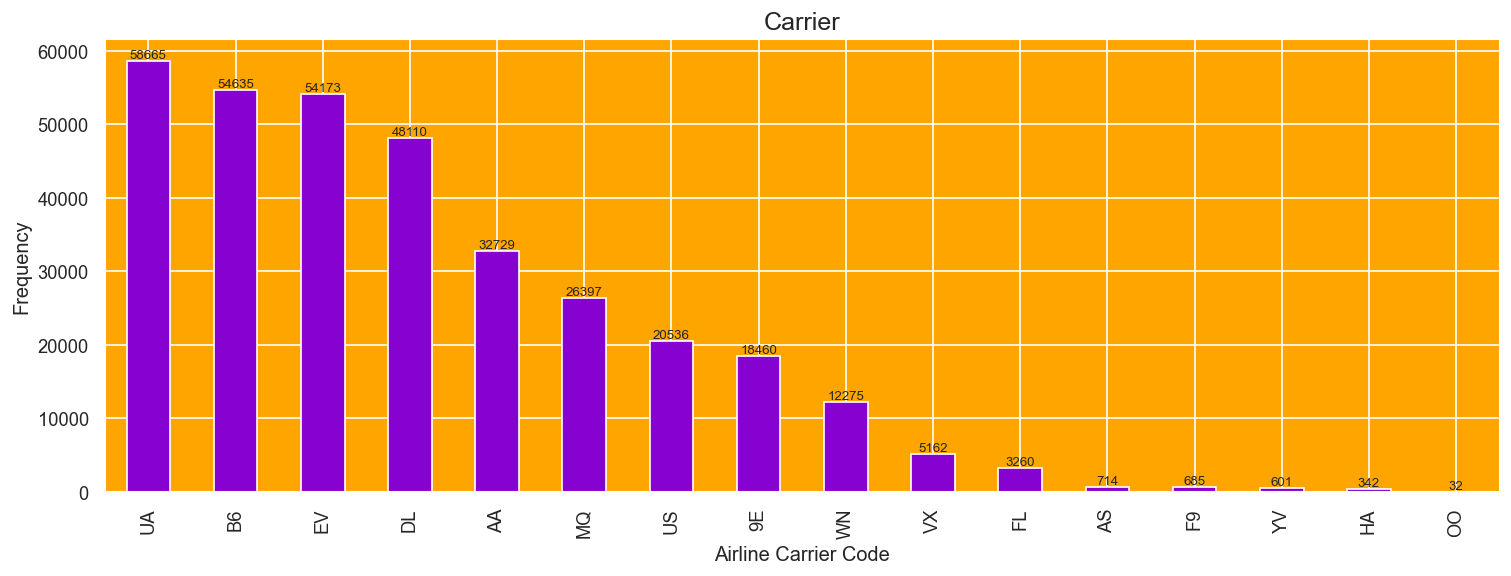

In [37]:
# A two-letter code representing the airline carrier responsible for the flight.
plot_bar(df['carrier'], 'Carrier', 'Airline Carrier Code')

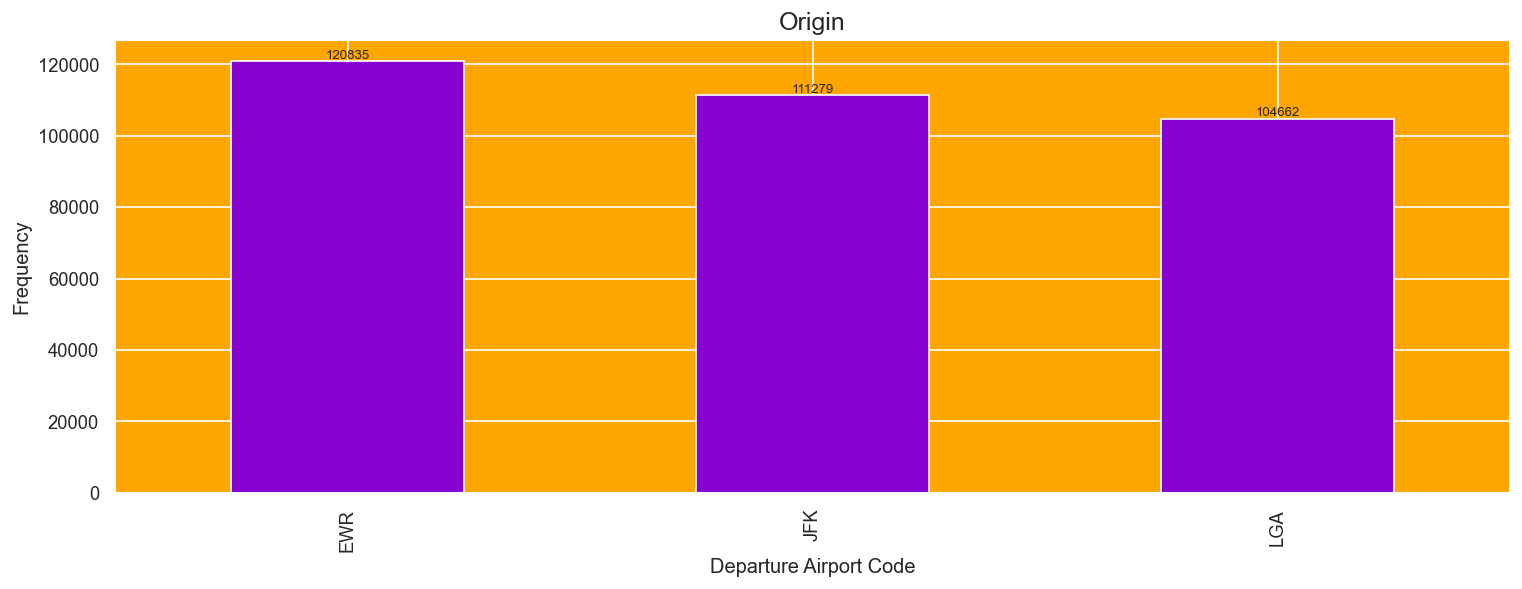

In [38]:
# A three-letter code signifying the airport from which the flight departed.
plot_bar(df['origin'], 'Origin', 'Departure Airport Code')

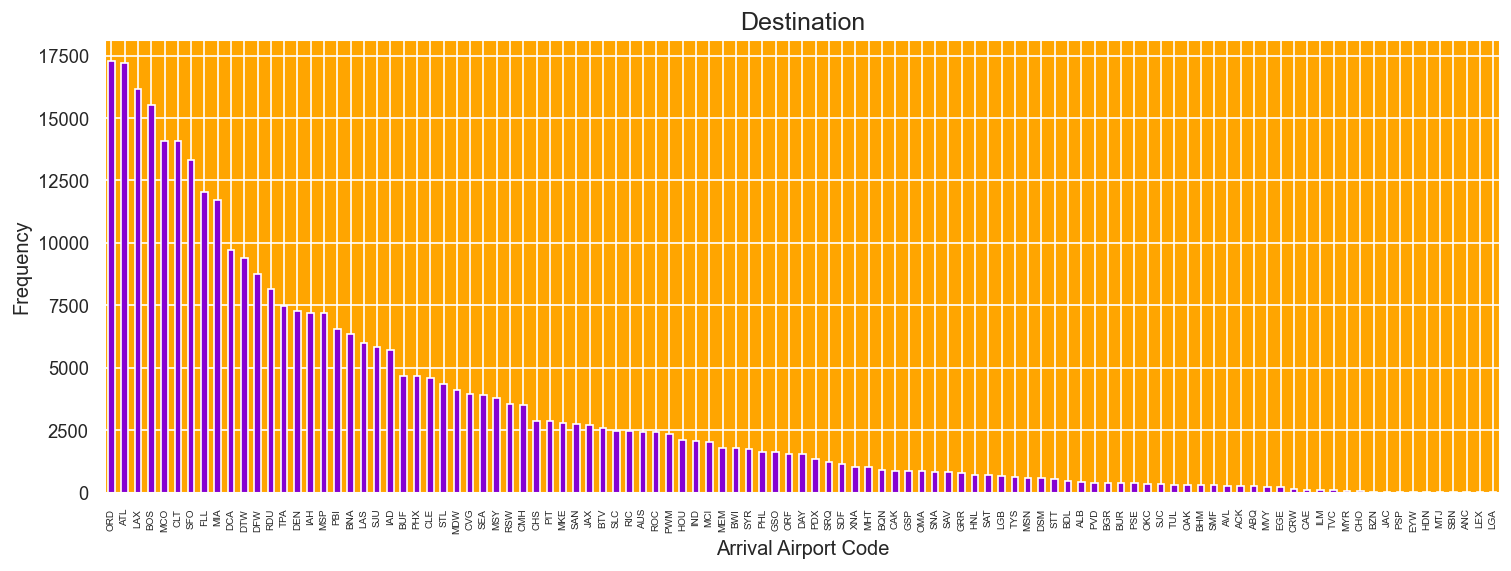

In [39]:
# A three-letter code representing the airport at which the flight arrived.
plt.figure(figsize=(15,5))
df['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=15)
plt.xlabel('Arrival Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

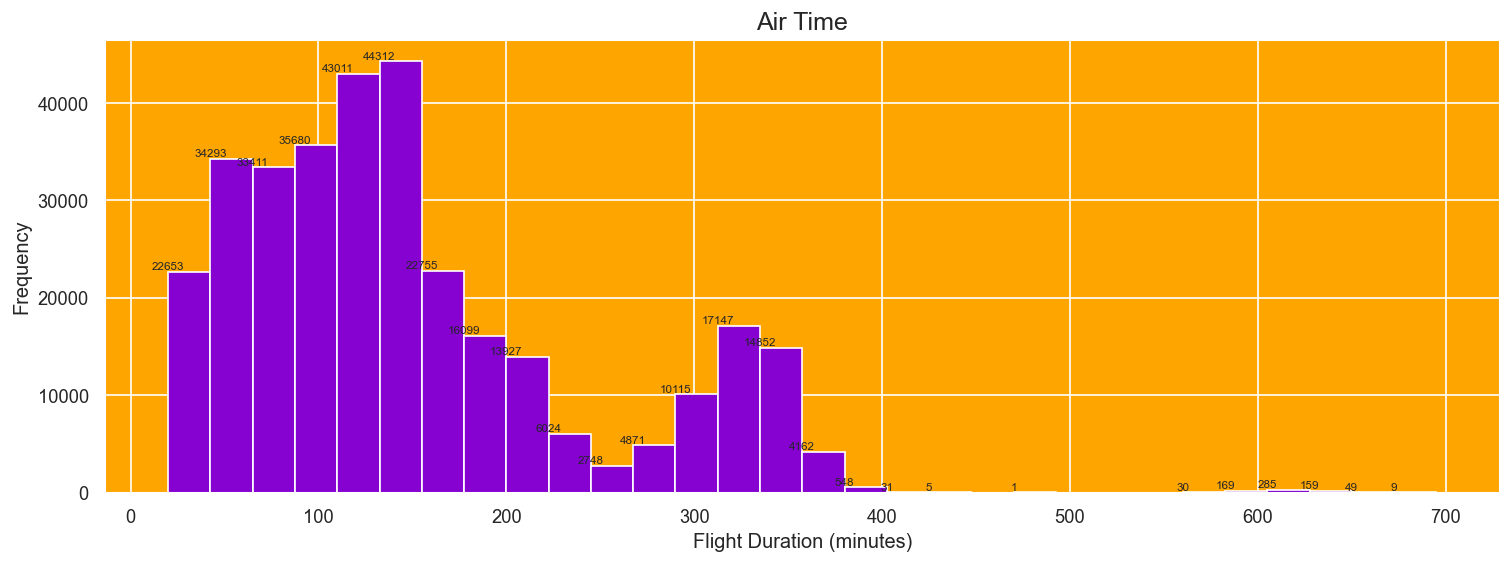

In [40]:
# The duration of the flight, measured in minutes.
plot_hist(df['air_time'].dropna(), bins=30, title='Air Time', xlabel='Flight Duration (minutes)', fontsize=7)

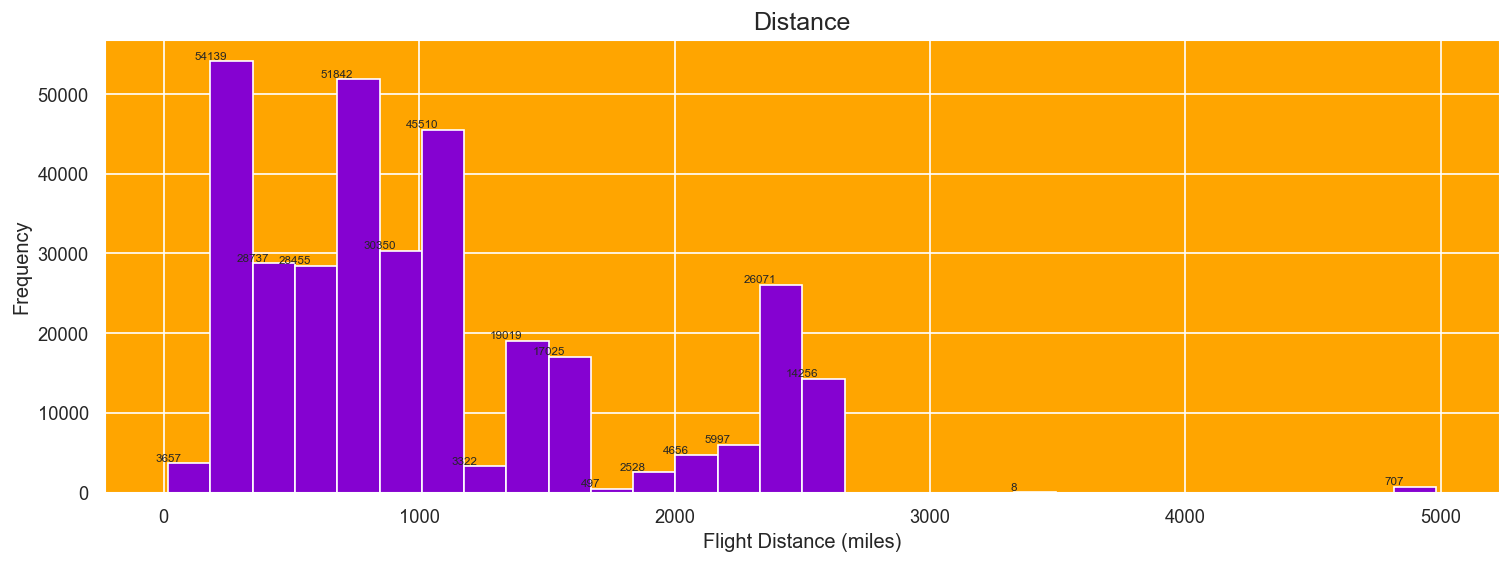

In [41]:
# The total distance (in miles) between the origin and destination airports.
plot_hist(df['distance'], bins=30, title='Distance', xlabel='Flight Distance (miles)', fontsize=7)

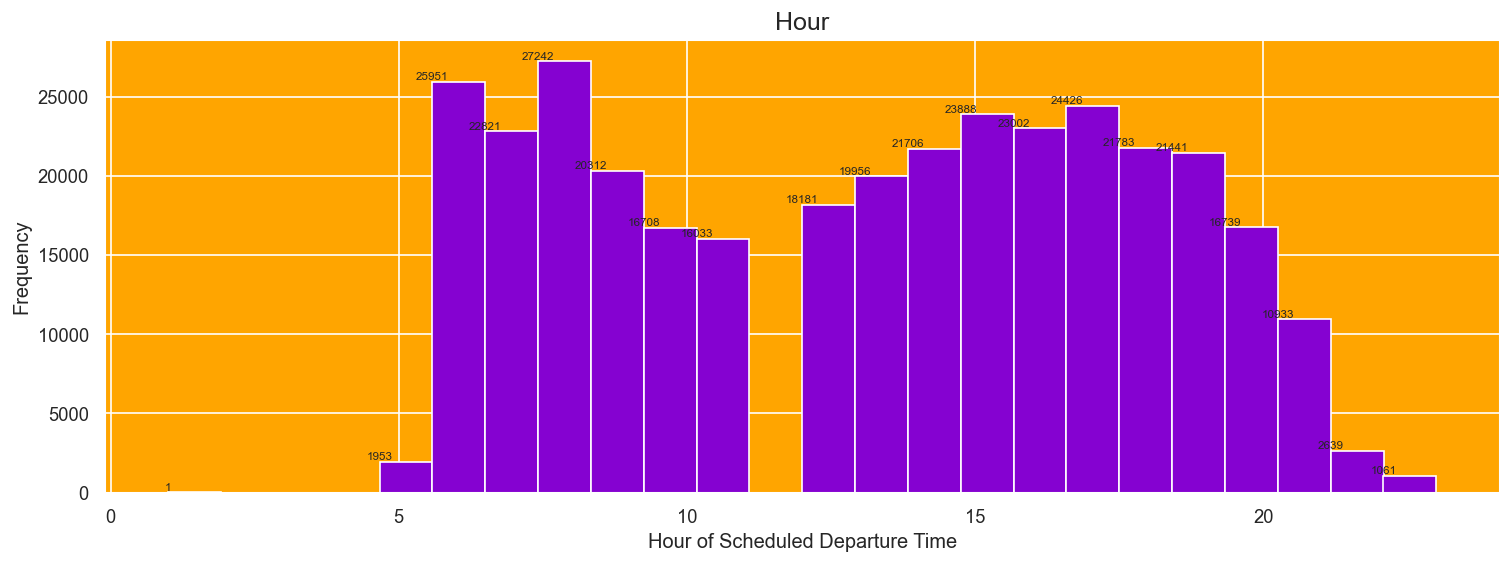

In [42]:
# The hour component of the scheduled departure time, expressed in local time.
plot_hist(df['hour'], bins=24, title='Hour', xlabel='Hour of Scheduled Departure Time', fontsize=7)

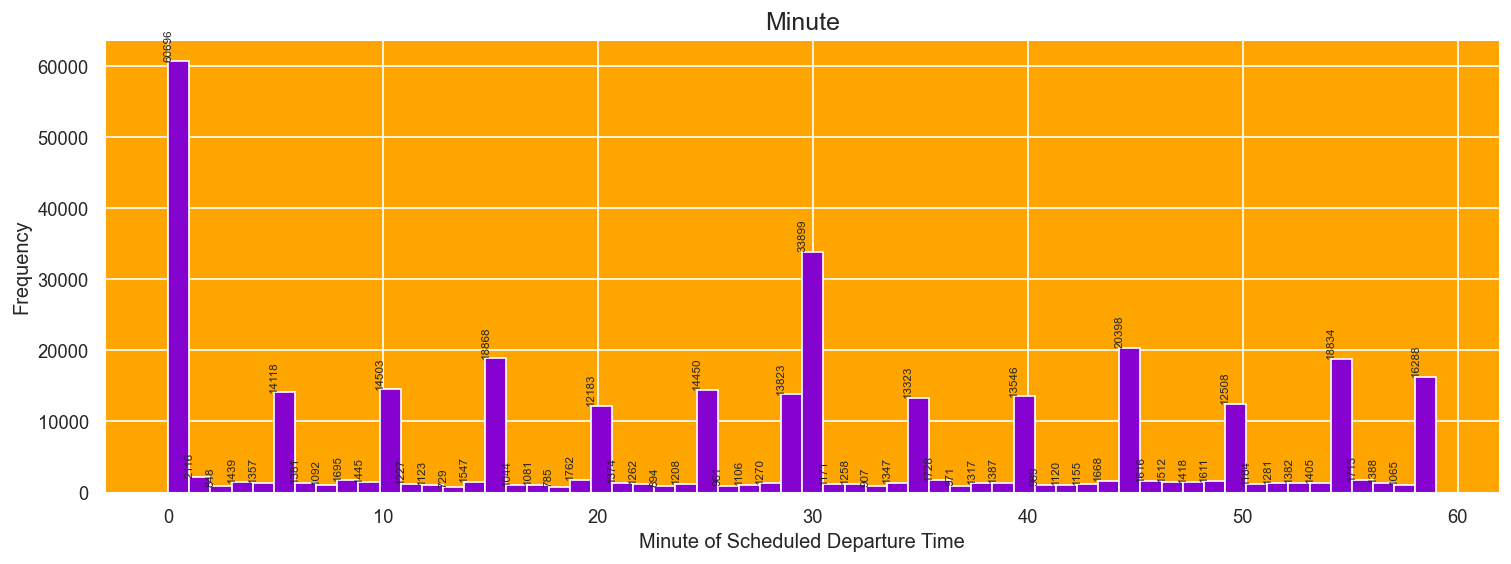

In [43]:
# The minute component of the scheduled departure time, expressed in local time.
plot_hist(df['minute'], bins=60, title='Minute', xlabel='Minute of Scheduled Departure Time', fontsize=7, rotation=90)

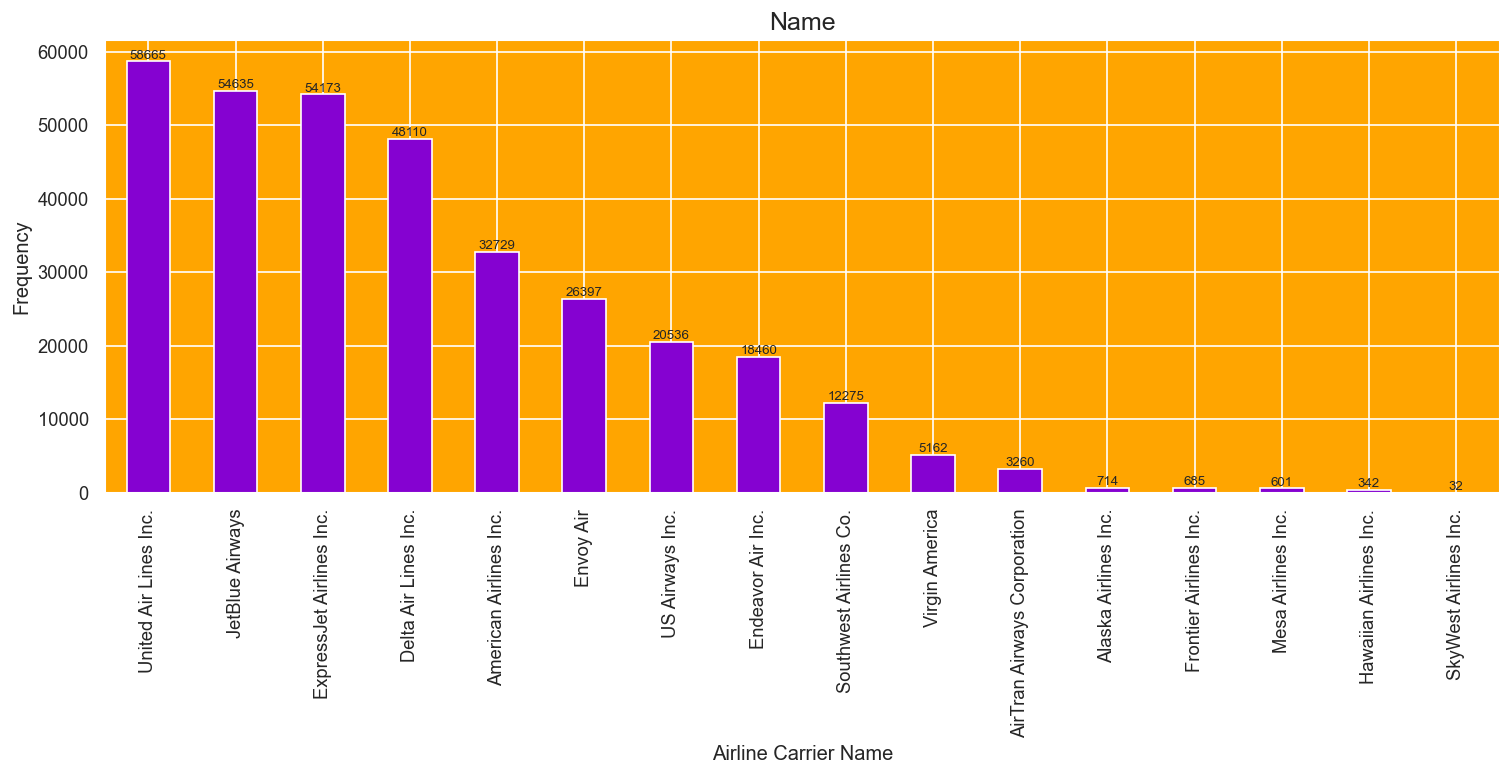

In [44]:
# The full name of the airline carrier responsible for the flight.
plot_bar(df['name'], 'Name', 'Airline Carrier Name')

In [45]:
# Define color palette with different shades of color #8502d1 for boxplots
colors_box = sns.dark_palette("#8502d1", as_cmap=False)

# Define colormap with different shades of color #8502d1 for scatter plots
colors_scatter = sns.dark_palette("#8502d1", as_cmap=True)

# Define the function to plot scatter plots
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.scatter(x, y, c=y, cmap=colors_scatter, s=2)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(label=ylabel)
    plt.show()

# Define the function to plot violin plots
def plot_violin(x, y, title, xlabel, ylabel, fontsize=8):
    plt.figure(figsize=(15,5))
    sns.violinplot(x=x, y=y, palette=colors_box)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.show()

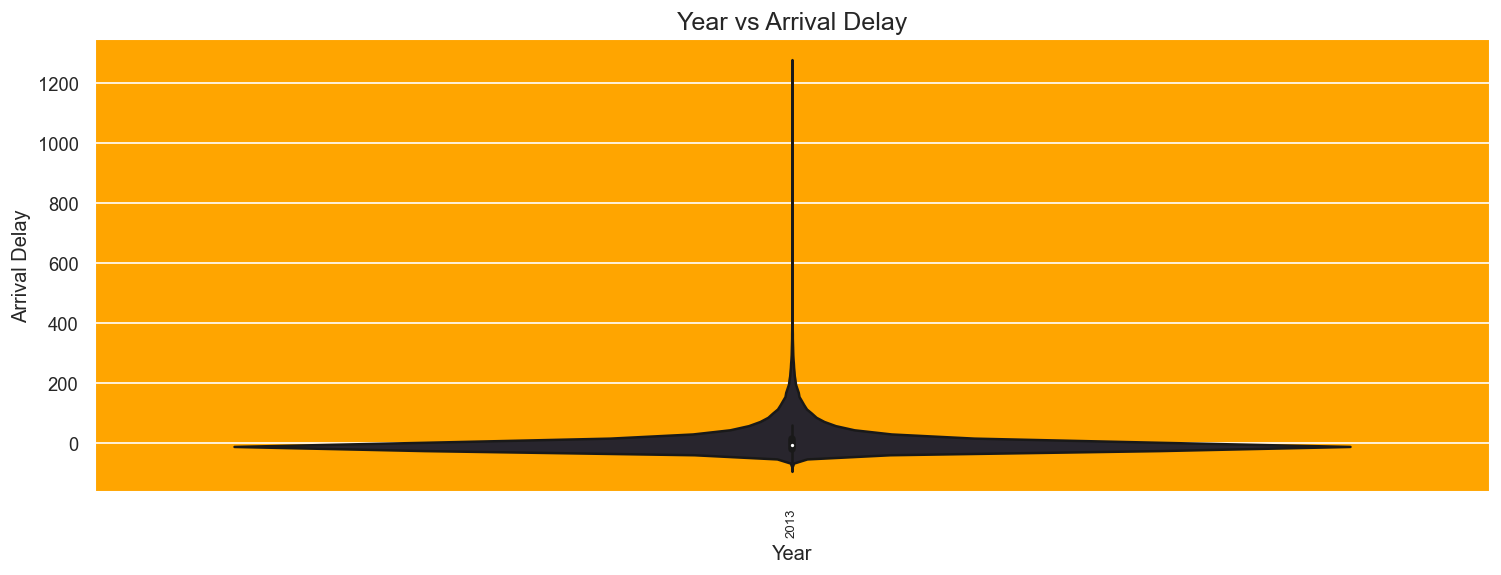

In [46]:
# year vs arr_delay
plot_violin(df['year'], df['arr_delay'], 'Year vs Arrival Delay', 'Year', 'Arrival Delay')

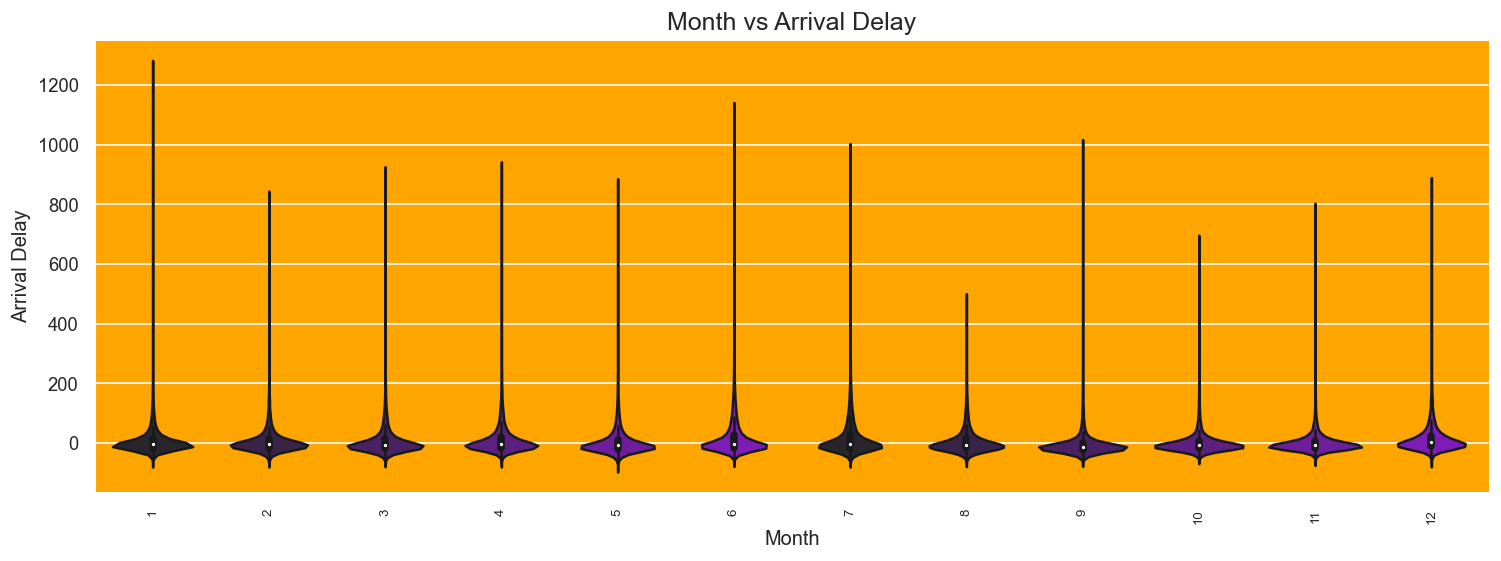

In [47]:
# month vs arr_delay
plot_violin(df['month'], df['arr_delay'], 'Month vs Arrival Delay', 'Month', 'Arrival Delay')

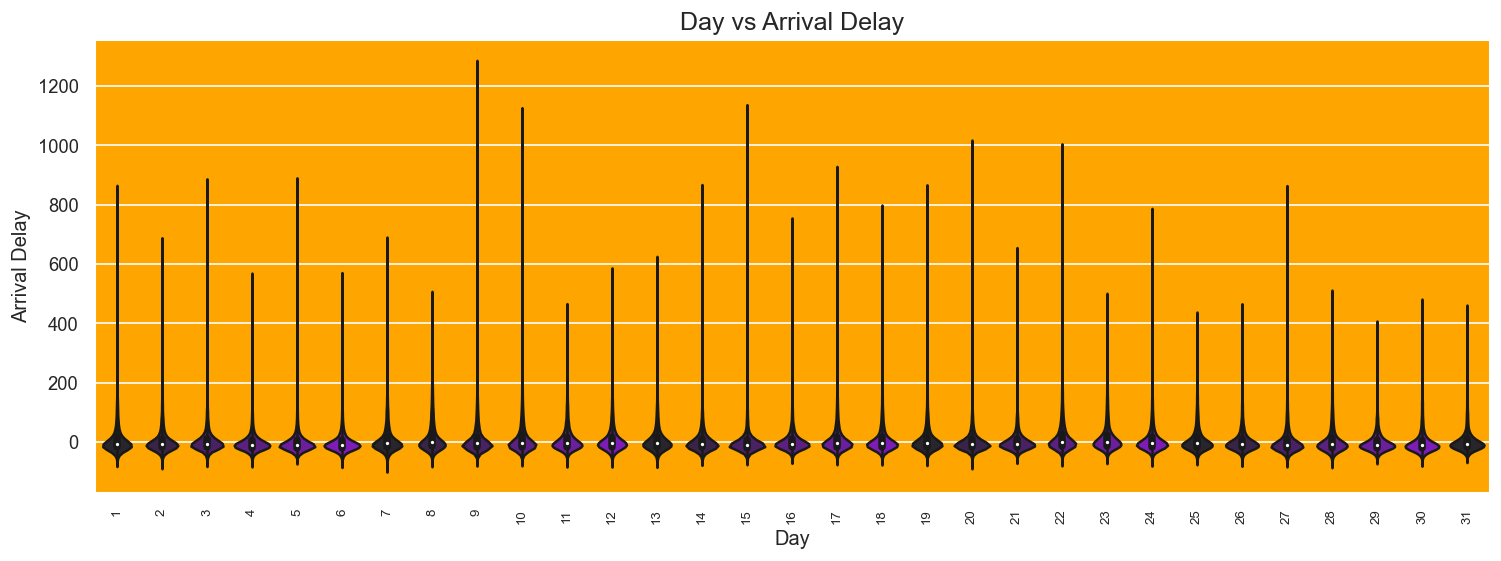

In [48]:
# day vs arr_delay
plot_violin(df['day'], df['arr_delay'], 'Day vs Arrival Delay', 'Day', 'Arrival Delay')

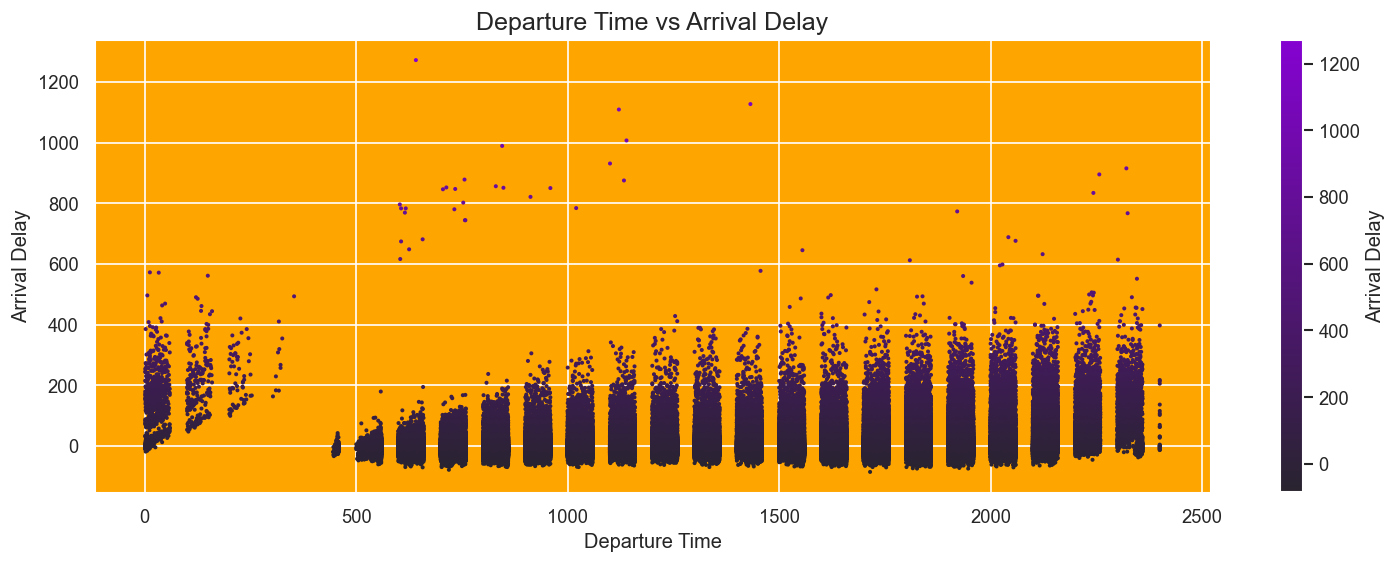

In [49]:
# dep_time vs arr_delay
plot_scatter(df['dep_time'], df['arr_delay'], 'Departure Time vs Arrival Delay', 'Departure Time', 'Arrival Delay')

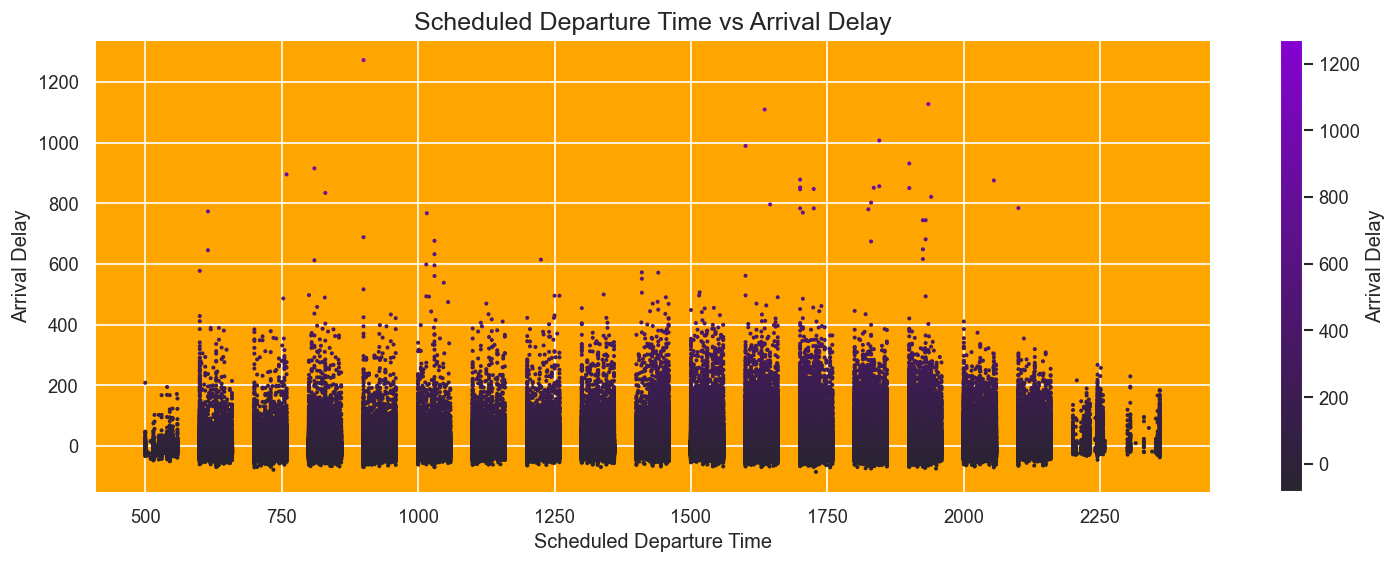

In [50]:
# sched_dep_time vs arr_delay
plot_scatter(df['sched_dep_time'], df['arr_delay'], 'Scheduled Departure Time vs Arrival Delay', 'Scheduled Departure Time', 'Arrival Delay')

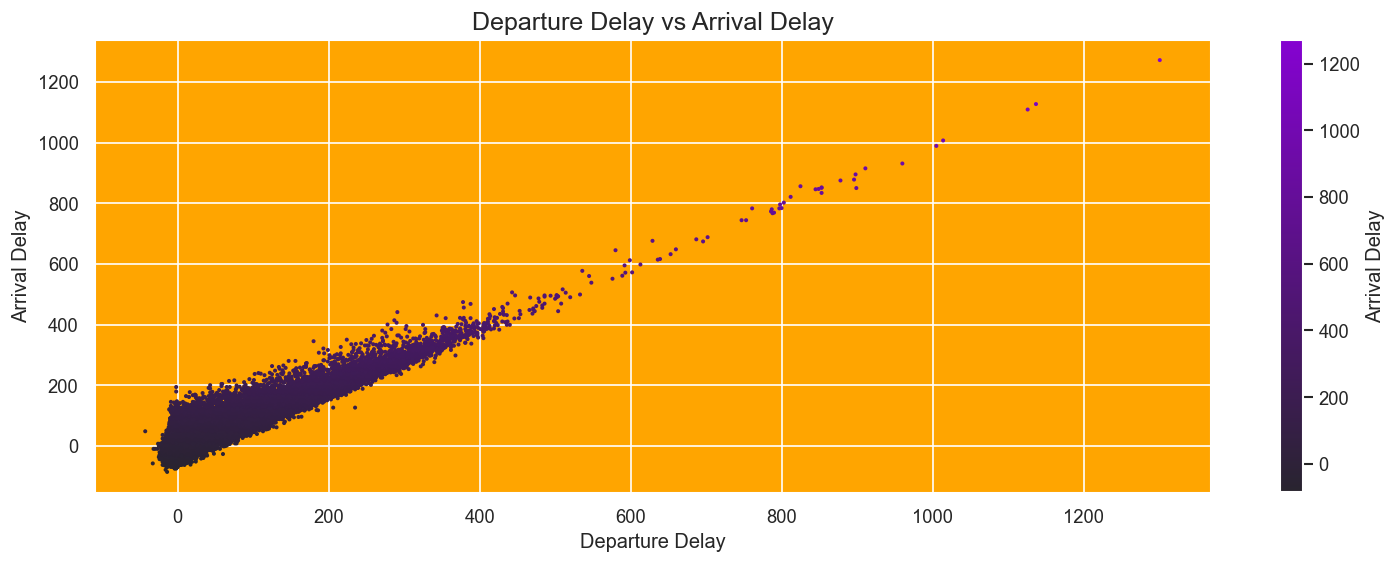

In [51]:
# dep_delay vs arr_delay
plot_scatter(df['dep_delay'], df['arr_delay'], 'Departure Delay vs Arrival Delay', 'Departure Delay', 'Arrival Delay')

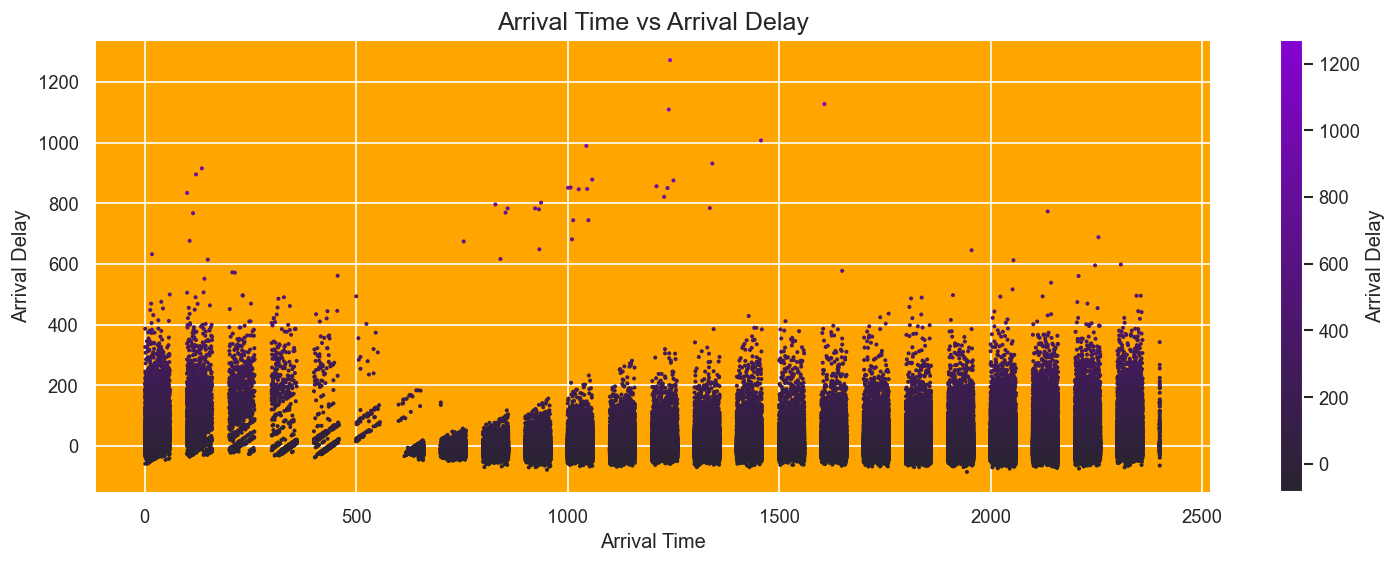

In [52]:
# arr_time vs arr_delay
plot_scatter(df['arr_time'], df['arr_delay'], 'Arrival Time vs Arrival Delay', 'Arrival Time', 'Arrival Delay')

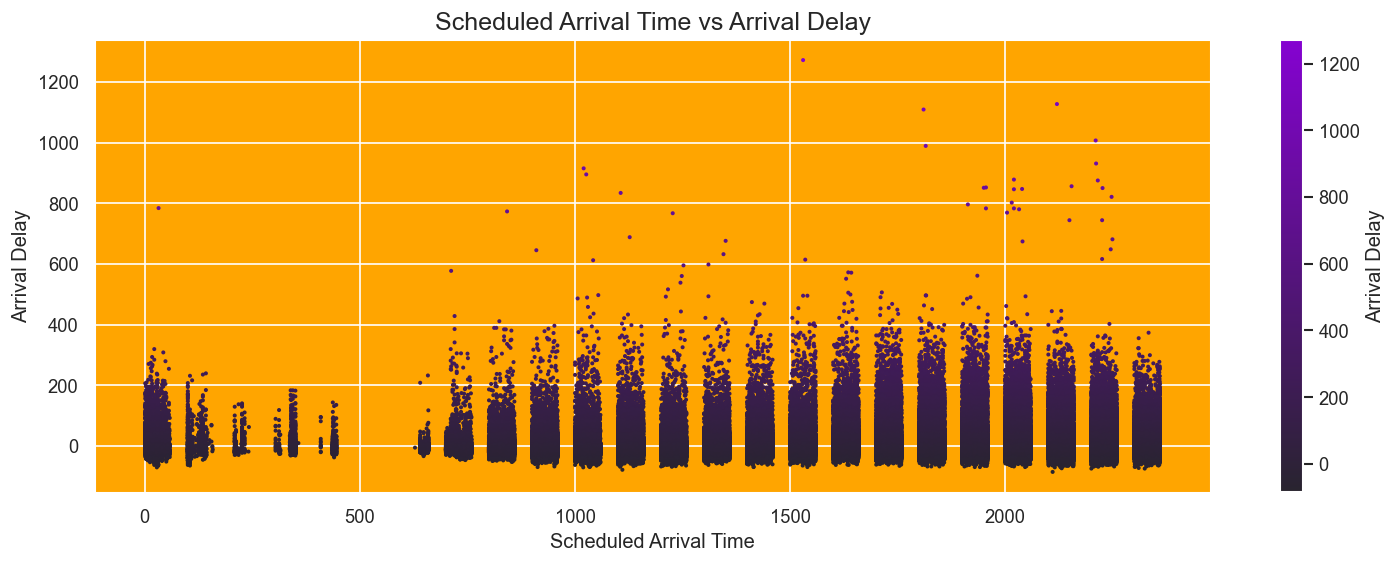

In [53]:
# sched_arr_time vs arr_delay
plot_scatter(df['sched_arr_time'], df['arr_delay'], 'Scheduled Arrival Time vs Arrival Delay', 'Scheduled Arrival Time', 'Arrival Delay')

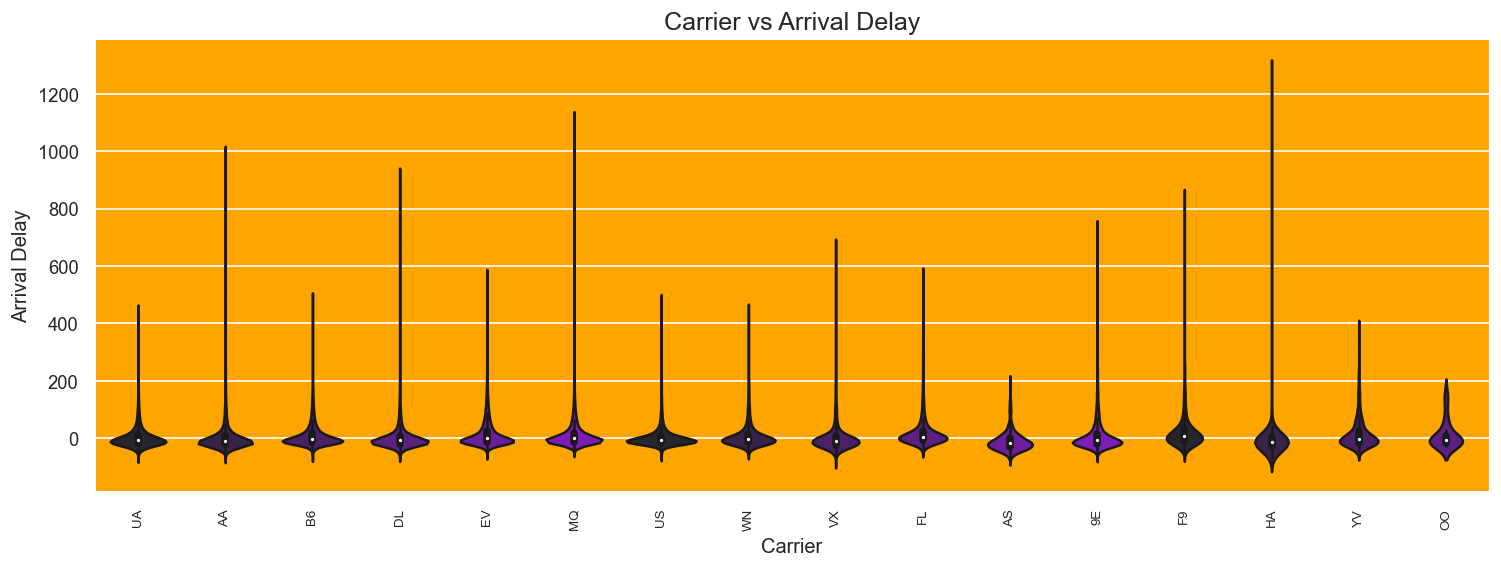

In [54]:
# carrier vs arr_delay
plot_violin(df['carrier'], df['arr_delay'], 'Carrier vs Arrival Delay', 'Carrier', 'Arrival Delay')

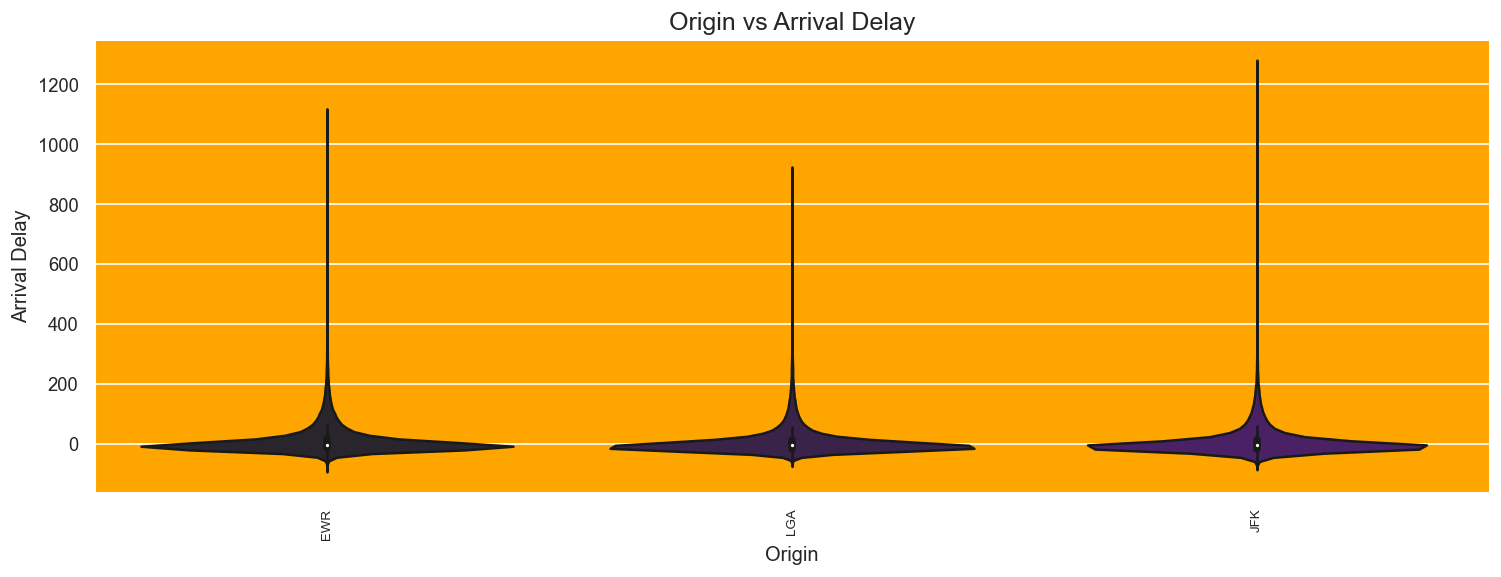

In [55]:
# origin vs arr_delay
plot_violin(df['origin'], df['arr_delay'], 'Origin vs Arrival Delay', 'Origin', 'Arrival Delay')

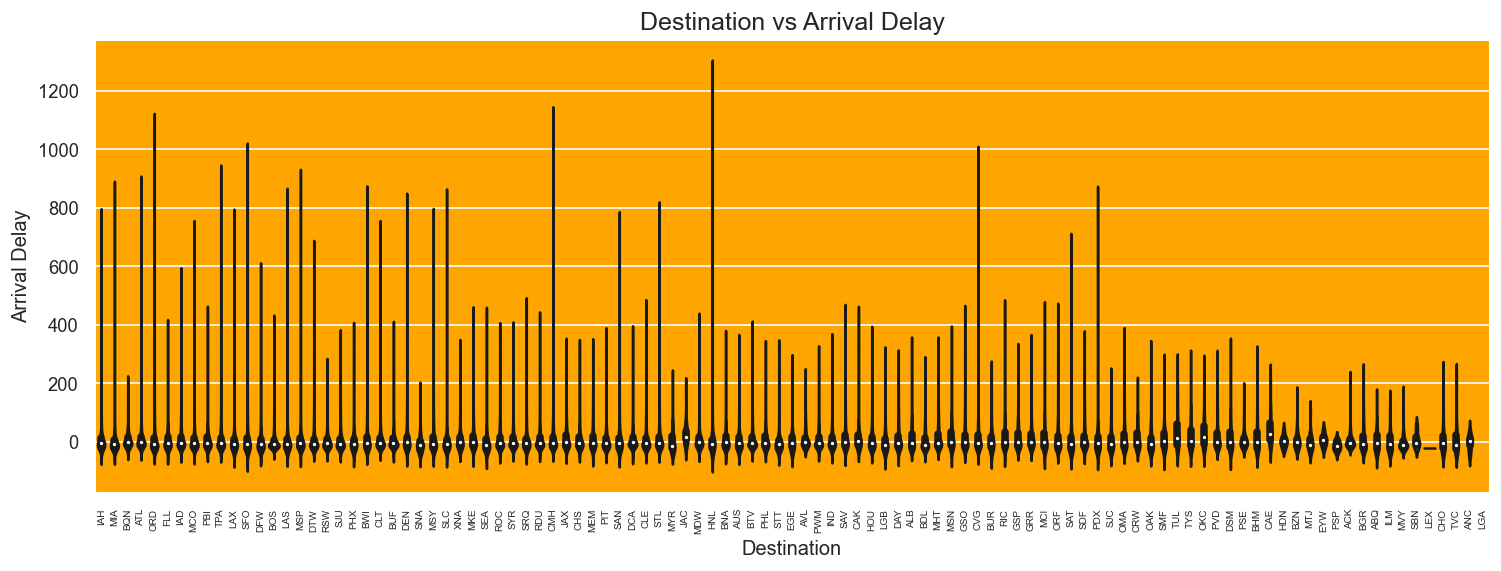

In [56]:
# dest vs arr_delay
plot_violin(df['dest'], df['arr_delay'], 'Destination vs Arrival Delay', 'Destination', 'Arrival Delay', fontsize=6)

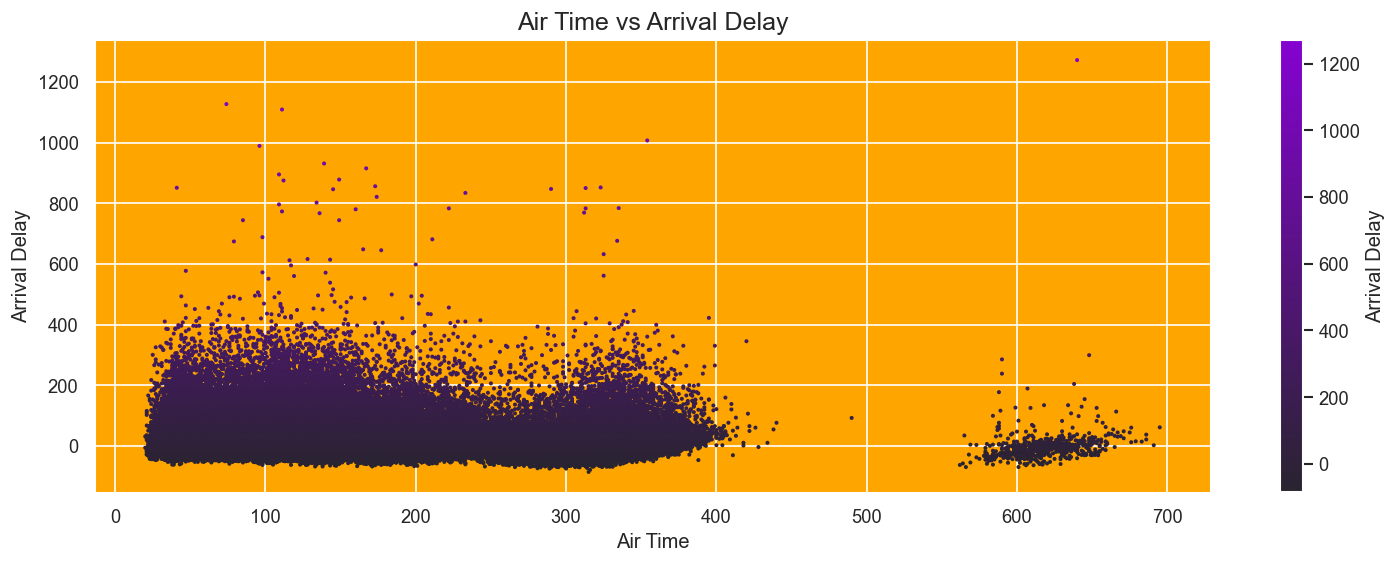

In [57]:
# air_time vs arr_delay
plot_scatter(df['air_time'], df['arr_delay'], 'Air Time vs Arrival Delay', 'Air Time', 'Arrival Delay')

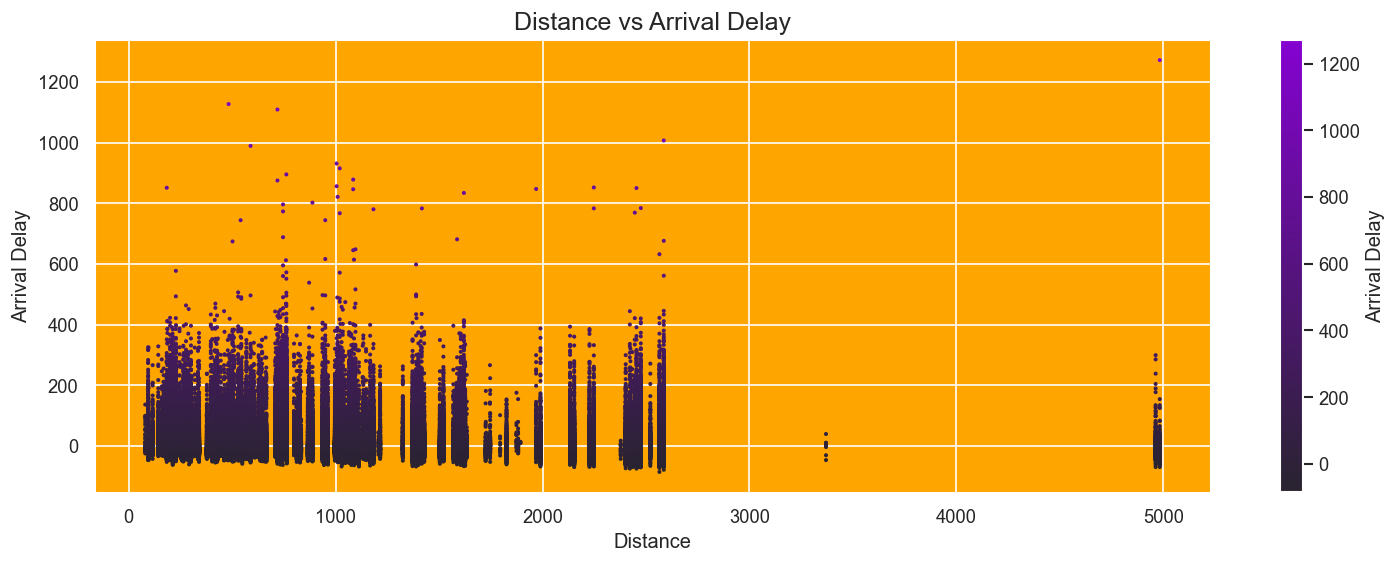

In [58]:
# distance vs arr_delay
plot_scatter(df['distance'], df['arr_delay'], 'Distance vs Arrival Delay', 'Distance', 'Arrival Delay')

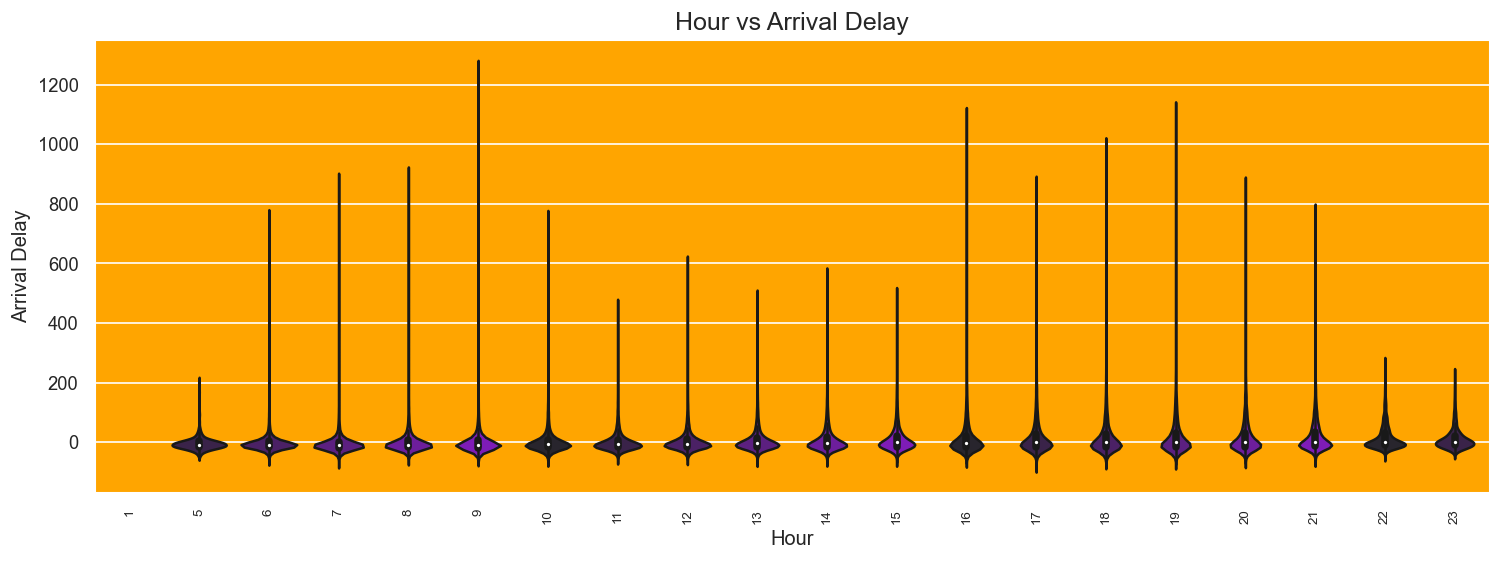

In [59]:
# hour vs arr_delay
plot_violin(df['hour'], df['arr_delay'], 'Hour vs Arrival Delay', 'Hour', 'Arrival Delay')

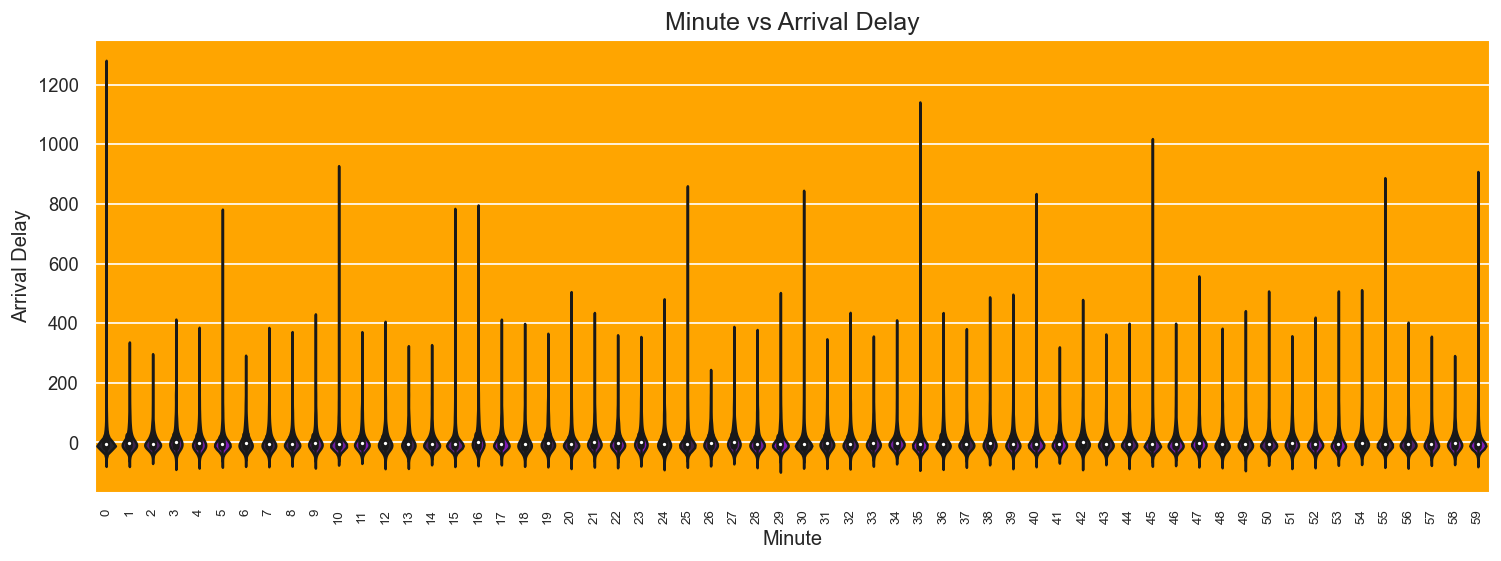

In [60]:
# minute vs arr_delay
plot_violin(df['minute'], df['arr_delay'], 'Minute vs Arrival Delay', 'Minute', 'Arrival Delay')

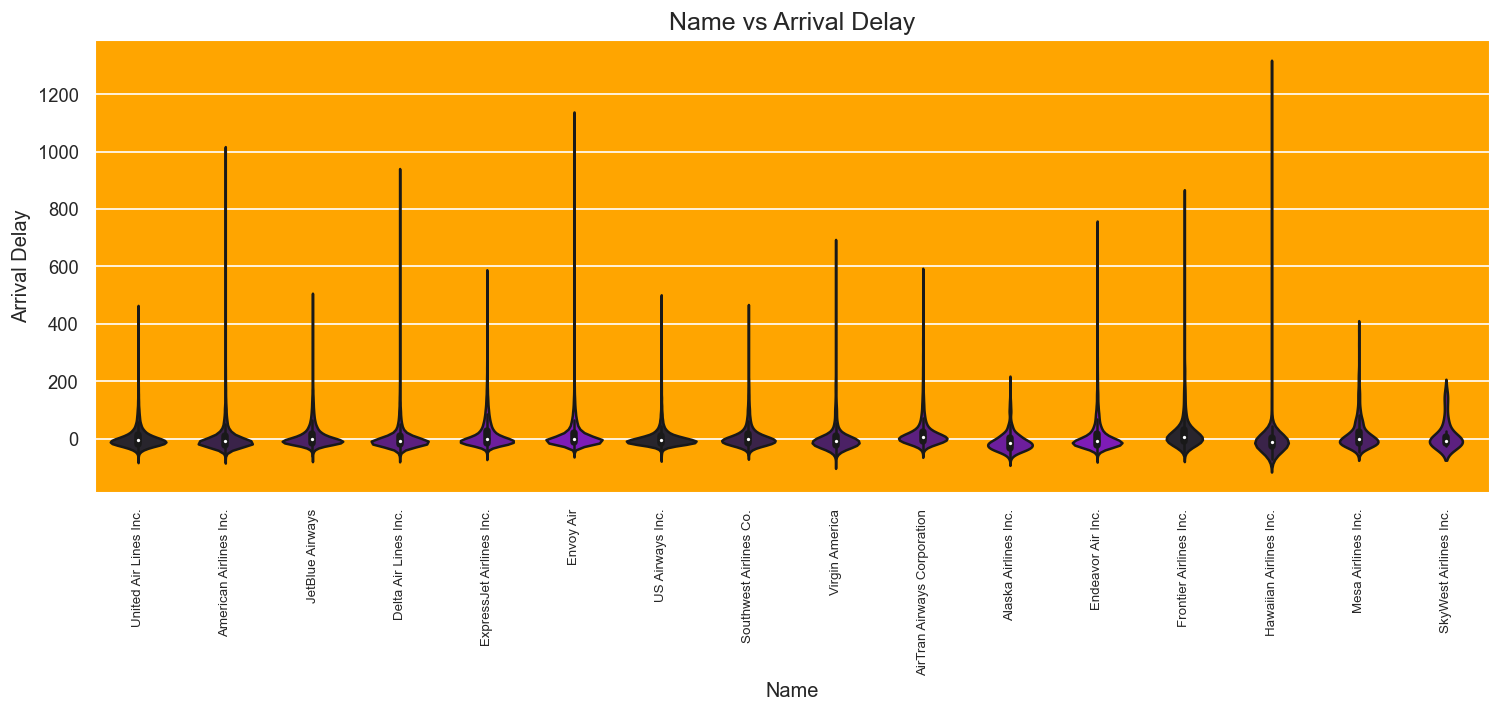

In [61]:
# name vs arr_delay
plot_violin(df['name'], df['arr_delay'], 'Name vs Arrival Delay', 'Name', 'Arrival Delay')

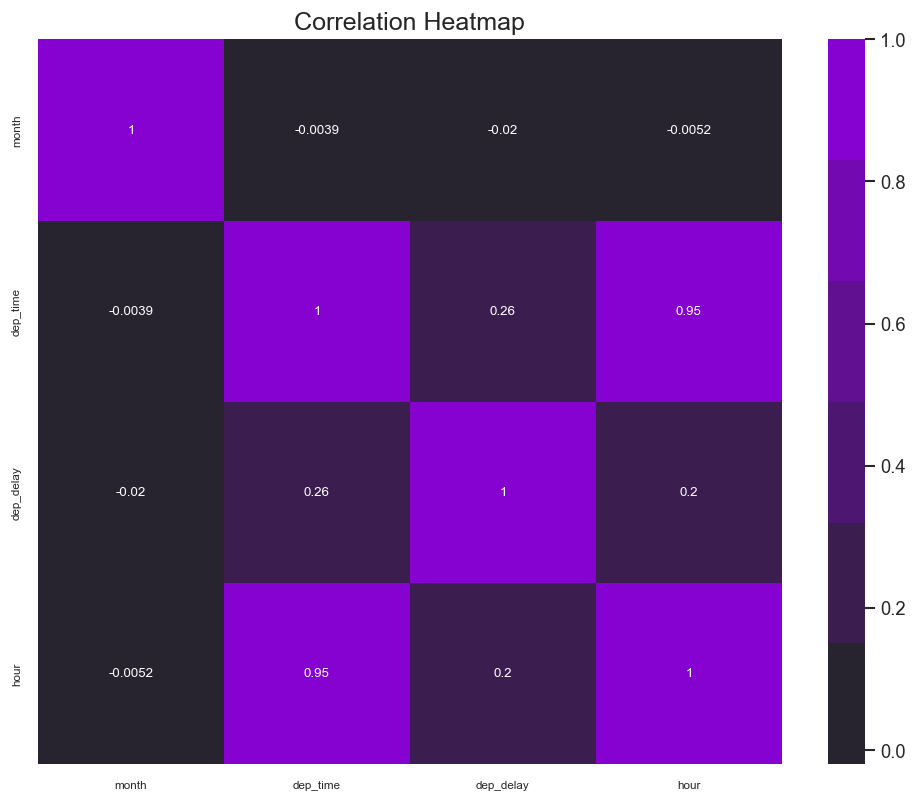

In [62]:
# Define color palette with different shades of color #8502d1 for multivariate plots
colors_multi = sns.dark_palette("#8502d1", as_cmap=False)

# For correlation heatmap, let's consider the numeric features only
numeric_features = ['month', 'dep_time', 'dep_delay', 'hour']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap=colors_multi, annot_kws={"size": 8})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

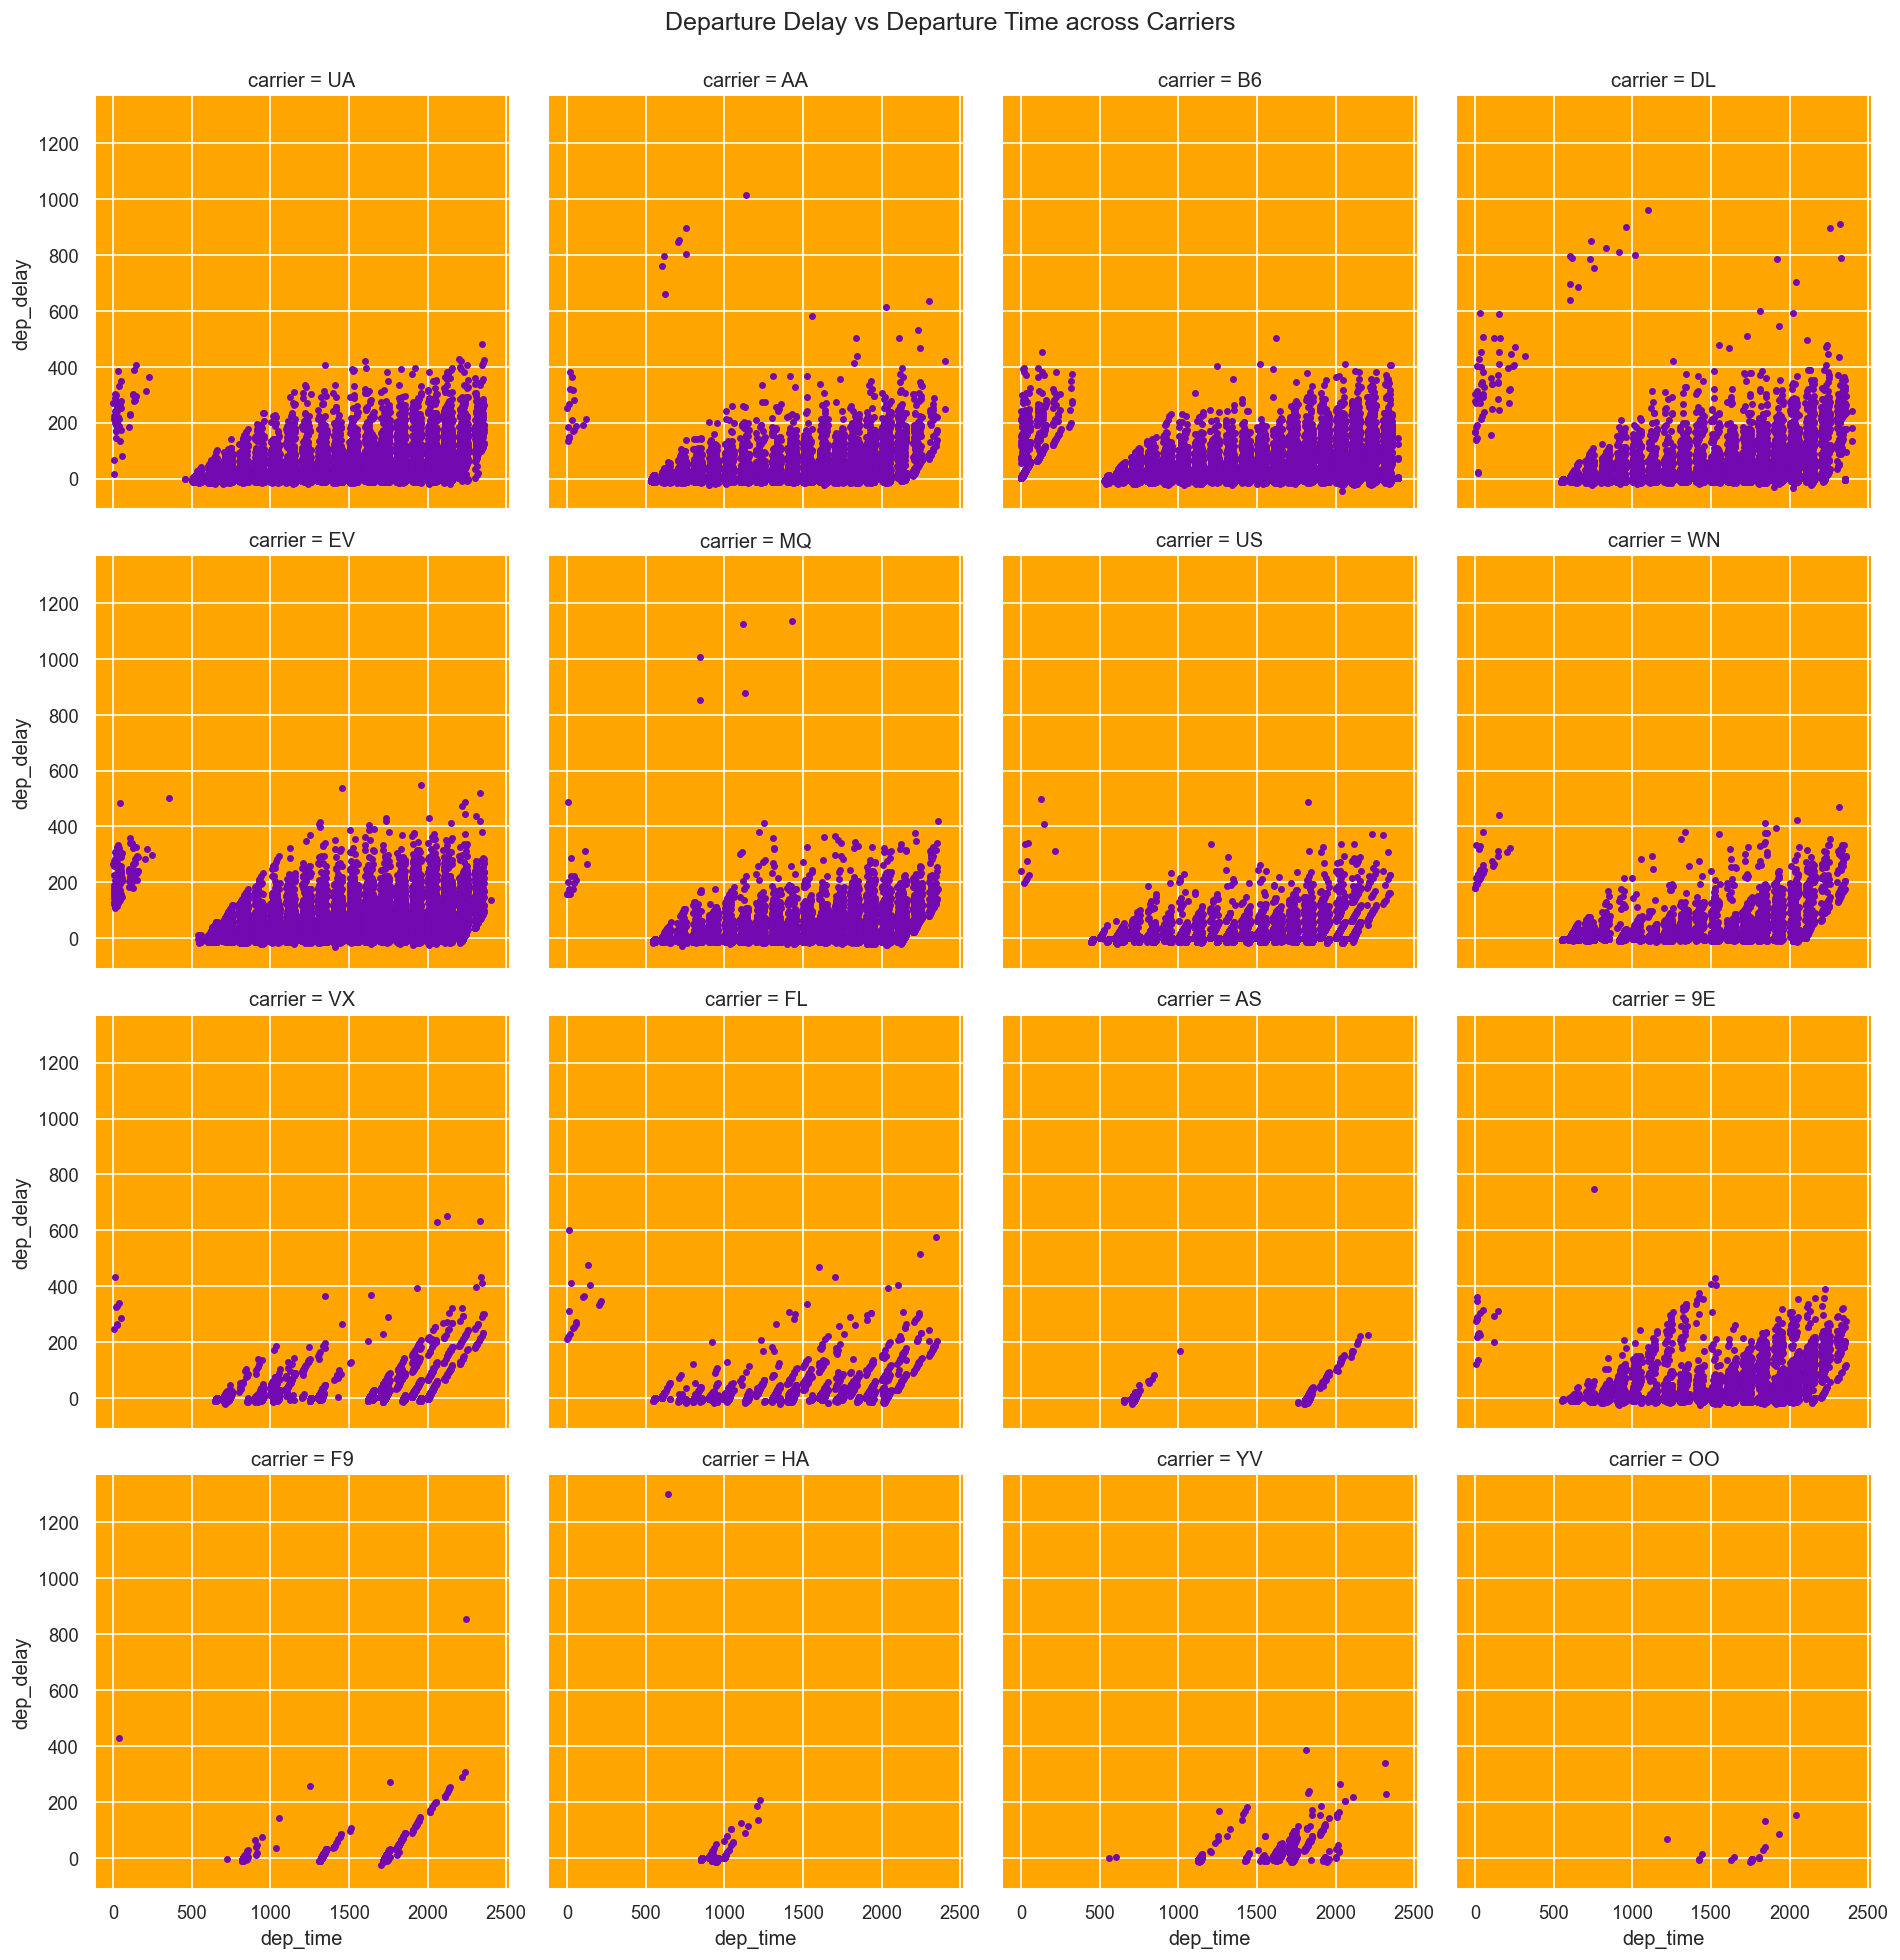

In [63]:
# 'dep_delay' vs 'dep_time' across different 'carrier'
g = sns.FacetGrid(df, col="carrier", col_wrap=4, height=4, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Carriers', fontsize=15, y=1.02)
plt.show()

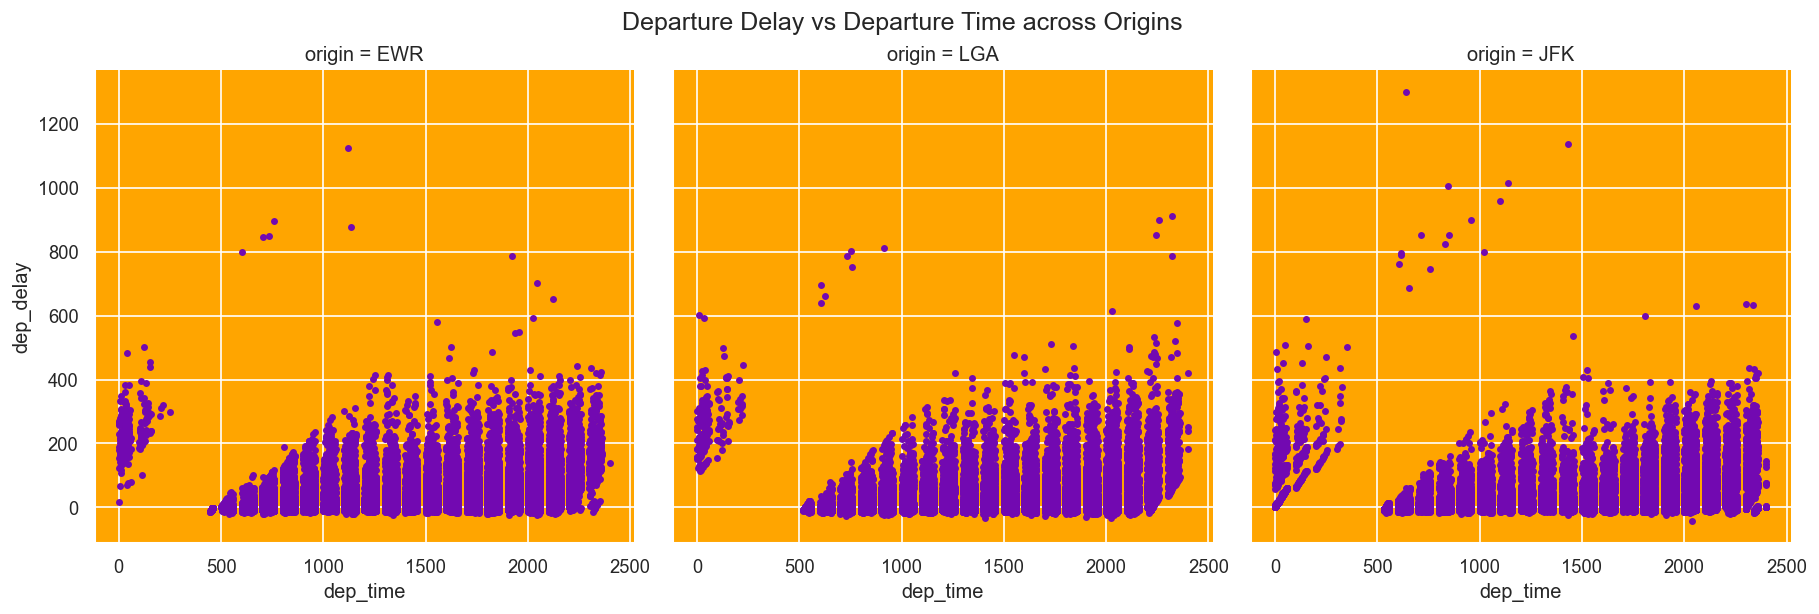

In [64]:
# 'dep_delay' vs 'dep_time' across different 'origin'
g = sns.FacetGrid(df, col="origin", col_wrap=4, height=5, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Origins', fontsize=15, y=1.02, x=0.38)
plt.show()